<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Projects/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Jatin Kumar Rana


# **Project Summary -**

**Introduction:**

The Zomato Restaurant Clustering and Sentiment Analysis project aim to leverage unsupervised machine learning techniques to extract valuable insights from the vast amount of user-generated data on the Zomato platform. Zomato, a popular online restaurant discovery and food delivery platform, accumulates a diverse set of reviews and ratings from users worldwide. The primary objectives of this project are to cluster restaurants based on various features and perform sentiment analysis on user reviews, providing a comprehensive understanding of the dining landscape.

**Data Collection and Preprocessing:**

The first step involves gathering data from the Zomato API, which provides detailed information about restaurants, including their location, cuisine, cost, user ratings, and reviews. The data undergoes thorough preprocessing to handle missing values, eliminate duplicates, and convert categorical variables into a suitable format for analysis. Additionally, text data preprocessing techniques such as tokenization, stemming, and removal of stop words are applied to enhance the quality of textual information.

**Feature Engineering:**

To facilitate clustering, relevant features are selected, including restaurant location, cuisine type, cost, and average user ratings. Additionally, text-based features such as sentiment scores extracted from reviews are incorporated. Feature scaling and normalization are performed to ensure that all features contribute equally to the clustering process.

**Clustering Analysis:**

Unsupervised machine learning algorithms like k-means clustering are applied to group restaurants with similar characteristics into distinct clusters. The optimal number of clusters is determined using techniques like the elbow method or silhouette analysis. The resulting clusters provide insights into the diverse culinary landscape, enabling users and businesses to identify patterns and trends within the restaurant data.

**Sentiment Analysis:**

Sentiment analysis is conducted on user reviews to assess the overall sentiment associated with each restaurant. Natural Language Processing (NLP) techniques, such as the use of sentiment lexicons or machine learning models like Support Vector Machines (SVM) or recurrent neural networks (RNN), are employed to classify reviews as positive, negative, or neutral. This analysis offers valuable information about customer satisfaction and the factors influencing their opinions.

**Visualization:**

The clustered restaurants and sentiment analysis results are visualized using charts, graphs, and maps. Geographic maps can display the distribution of restaurant clusters across different regions, while bar charts and word clouds help illustrate sentiment distribution and common themes in user reviews. These visualizations make it easier for users and stakeholders to grasp the trends and patterns uncovered by the analysis.

**Insights and Recommendations:**

The project concludes with the extraction of actionable insights and recommendations for Zomato users, restaurant owners, and the platform itself. Users can benefit from discovering new restaurants within specific clusters that match their preferences. Restaurant owners can gain insights into the factors influencing customer satisfaction and adjust their strategies accordingly. Zomato can utilize the findings to enhance user experience, improve recommendation algorithms, and refine the overall platform.

In conclusion, the Zomato Restaurant Clustering and Sentiment Analysis project harnesses the power of unsupervised machine learning to uncover meaningful patterns in restaurant data. By clustering restaurants and analyzing user sentiments, the project delivers valuable insights that can enhance the dining experience for both users and restaurant owners, contributing to the continual improvement of the Zomato platform.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the dynamic landscape of online restaurant platforms, Zomato faces the challenge of efficiently organizing and extracting valuable insights from the vast array of user-generated data. The abundance of information, including restaurant details, user reviews, and ratings, poses a significant opportunity for enhancement. The challenge at hand is to develop an unsupervised machine learning solution that clusters restaurants based on diverse features and performs sentiment analysis on user reviews. This solution aims to provide a nuanced understanding of the culinary landscape, assisting users in making informed dining choices and empowering restaurant owners to tailor their offerings to meet customer expectations. The primary goal is to harness the potential of unsupervised learning to uncover patterns and sentiments within the data, ultimately contributing to an improved and more personalized experience for Zomato users and a more data-driven approach for restaurant owners and the Zomato platform itself.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [567]:
# Import Libraries
import pandas as pd
import numpy as np
# from numpy import unique
from numpy import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('desplay.max_columns',None)

import datetime

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import re
import spacy
import scipy.stats as stats

!pip install contractions
import contractions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer

import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [441]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [442]:
zom_rest_name_df = pd.read_csv('/content/drive/MyDrive/Project_csv_Datasets/Zomato Restaurant names and Metadata.csv')
zom_rest_review_df = pd.read_csv('/content/drive/MyDrive/Project_csv_Datasets/Zomato Restaurant reviews.csv')

### Dataset First View

In [443]:
zom_rest_name_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [444]:
zom_rest_review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [445]:
# Rows & Columns count in 'Restaurant name' dataset
no_of_row = zom_rest_name_df.shape[0]
no_of_col = zom_rest_name_df.shape[1]

print(f"Number of rows in zom_rest_name_df = {no_of_row} \nNumber of columns in zom_rest_name_df = {no_of_col}")

Number of rows in zom_rest_name_df = 105 
Number of columns in zom_rest_name_df = 6


In [446]:
# Rows & Columns count in 'Restaurant review' dataset
no_of_row = zom_rest_review_df.shape[0]
no_of_col = zom_rest_review_df.shape[1]

print(f"Number of rows in zom_rest_review_df = {no_of_row} \nNumber of columns in zom_rest_review_df = {no_of_col}")

Number of rows in zom_rest_review_df = 10000 
Number of columns in zom_rest_review_df = 7


### Dataset Information

In [447]:
# Dataset Info
zom_rest_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [448]:
zom_rest_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [449]:
# Calculating the number of duplicate values in each column of the Restaurant Name dataset
num_of_dup = zom_rest_name_df.apply(lambda x: x.duplicated().sum())
print(f'Number of Duplicate Values in Each Column:\n{num_of_dup}')

# Calculating duplicate rows in the Restaurant Name dataset
print(f'\nNumber of Duplicate row in the dataset is:{zom_rest_name_df.duplicated().sum()}')

Number of Duplicate Values in Each Column:
Name            0
Links           0
Cost           76
Collections    62
Cuisines       13
Timings        27
dtype: int64

Number of Duplicate row in the dataset is:0


In [450]:
# Calculating the number of duplicate values in each column of the Restaurant Review dataset
num_of_dup = zom_rest_review_df.apply(lambda x: x.duplicated().sum())
print(f'Number of Duplicate Values in Each Column:\n{num_of_dup}')

# Calculating duplicate rows in the Restaurant Review dataset
print(f'\nNumber of Duplicate row in the dataset is:{zom_rest_review_df.duplicated().sum()}')

Number of Duplicate Values in Each Column:
Restaurant    9900
Reviewer      2553
Review         635
Rating        9989
Metadata      7522
Time           217
Pictures      9964
dtype: int64

Number of Duplicate row in the dataset is:36


#### Missing Values/Null Values

In [451]:
# Count the Missing Values/Null Values in the whole 'Restaurant Name' dataframe
null_value_count_1 = zom_rest_name_df.isnull().sum().sum()
print(f"Number of null values in the zom_rest_name dataframe is {null_value_count_1}.\n")

# Count the Missing Values/Null Values in each column
bool_df = zom_rest_name_df.isnull()
column_name_list = list(zom_rest_name_df.columns)
null_value_list = []

for i in column_name_list:
    null_value = (bool_df[i] == True).sum()
    null_value_list.append(null_value)

null_value_count_col_1 = pd.DataFrame({'Column Name': column_name_list, 'Null Value Count': null_value_list})
print(null_value_count_col_1)

Number of null values in the zom_rest_name dataframe is 55.

   Column Name  Null Value Count
0         Name                 0
1        Links                 0
2         Cost                 0
3  Collections                54
4     Cuisines                 0
5      Timings                 1


In [452]:
# Count the Missing Values/Null Values in the whole 'Restaurant Review' dataframe
null_value_count_2 = zom_rest_review_df.isnull().sum().sum()
print(f"Number of null values in the zom_rest_review dataframe is {null_value_count_2}.\n")

# Count the Missing Values/Null Values in each column
bool_df = zom_rest_review_df.isnull()
column_name_list = list(zom_rest_review_df.columns)
null_value_list = []

for i in column_name_list:
    null_value = (bool_df[i] == True).sum()
    null_value_list.append(null_value)

null_value_count_col_2 = pd.DataFrame({'Column Name': column_name_list, 'Null Value Count': null_value_list})
print(null_value_count_col_2)

Number of null values in the zom_rest_review dataframe is 197.

  Column Name  Null Value Count
0  Restaurant                 0
1    Reviewer                38
2      Review                45
3      Rating                38
4    Metadata                38
5        Time                38
6    Pictures                 0


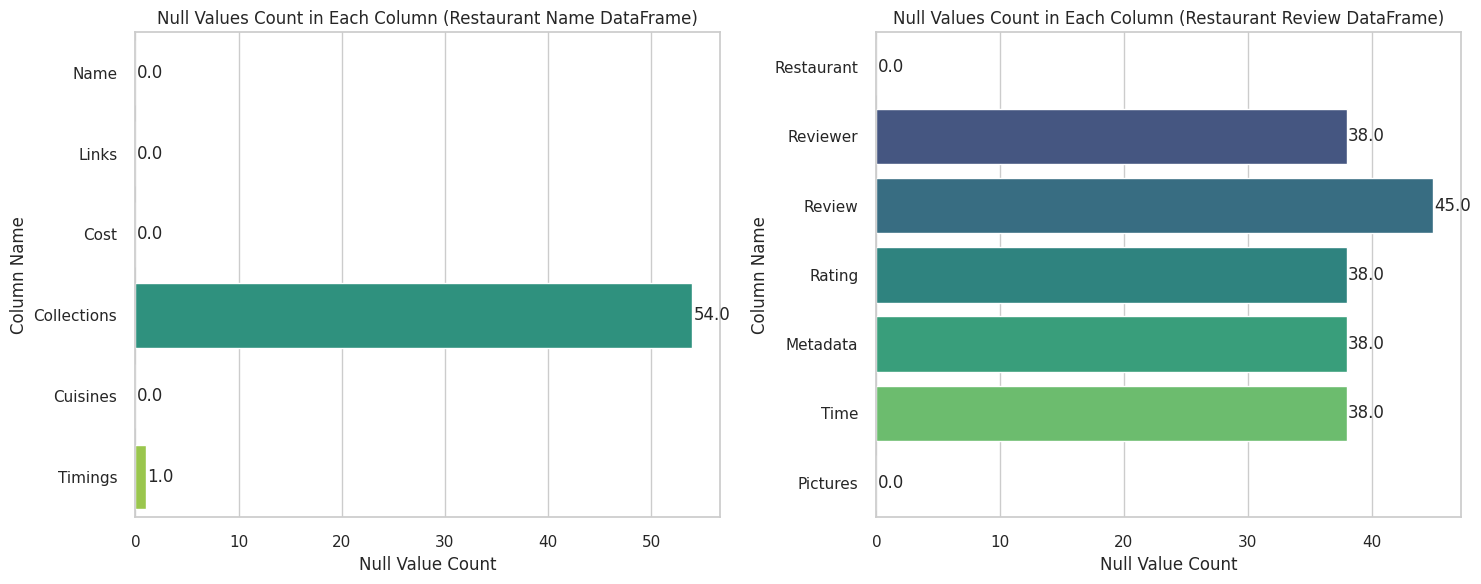

In [453]:
# Visualizing the missing values
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the null values count for each column in the 'zom_rest_name_df' DataFrame
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Null Value Count', y='Column Name', data=null_value_count_col_1, palette='viridis')
ax1.set_title('Null Values Count in Each Column (Restaurant Name DataFrame)')
ax1.set_xlabel('Null Value Count')

# Display the count on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

# Plotting the null values count for each column in the 'zom_rest_review_df' DataFrame
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Null Value Count', y='Column Name', data=null_value_count_col_2, palette='viridis')
ax2.set_title('Null Values Count in Each Column (Restaurant Review DataFrame)')
ax2.set_xlabel('Null Value Count')

# Display the count on top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.tight_layout()
plt.show()


### What did you know about your dataset?

**[] Restaurant Name Dataset:**

**1. Number of Rows and Columns:**

* Rows: 105
* Columns: 6

**2. Data Types and Non-Null Counts:**

* All columns have the 'object' data type.
* 'Collections' and 'Timings' columns have some missing values.

**3. Duplicate Values:**

* There are no duplicate rows in the dataset.
* The 'Cost', 'Collections', 'Cuisines', and 'Timings' columns have some duplicate values.

**4. Null Values:**

* 'Collections' has 54 null values.
* 'Timings' has 1 null value.

**[] Restaurant Review Dataset:**

**1. Number of Rows and Columns:**

* Rows: 10,000
* Columns: 7

**2. Data Types and Non-Null Counts:**

* 'Pictures' is the only column with the 'int64' data type.
* Other columns have the 'object' data type.
* Multiple columns have missing values.

**3. Duplicate Values:**

* There are 36 duplicate rows in the dataset.
* 'Restaurant', 'Reviewer', 'Rating', 'Metadata', and 'Pictures' columns have duplicate values.

**4. Null Values:**

* Multiple columns have missing values, with the 'Rating' and 'Time' columns having 38 null values each.

## ***2. Understanding Your Variables***

In [454]:
# Dataset Columns
print(pd.DataFrame(zom_rest_name_df.columns, columns=['Variables of Restaurant Name DataFrame']), '\n')
print(pd.DataFrame(zom_rest_review_df.columns, columns=['Variables of Restaurant Review DataFrame']))

  Variables of Restaurant Name DataFrame
0                                   Name
1                                  Links
2                                   Cost
3                            Collections
4                               Cuisines
5                                Timings 

  Variables of Restaurant Review DataFrame
0                               Restaurant
1                                 Reviewer
2                                   Review
3                                   Rating
4                                 Metadata
5                                     Time
6                                 Pictures


In [455]:
# Dataset Describe
zom_rest_name_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [456]:
zom_rest_review_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

### Variables Description


**Restaurant Name DataFrame:**

1. Name: Restaurant name (String)
2. Links: Associated links (String)
3. Cost: Dining cost (String)
4. Collections: Categories (String, with some missing values)
5. Cuisines: Types of cuisines (String)
6. Timings: Operating hours (String, with some missing values)

**Restaurant Review DataFrame:**

1. Restaurant: Reviewed restaurant name (String)
2. Reviewer: Reviewer identifier (String, with some missing values)
3. Review: Text of the review (String, with some missing values)
4. Rating: Numeric rating (String, with some missing values)
5. Metadata: Additional information (String, with some missing values)
6. Time: Timestamp of the review (String, with some missing values)
7. Pictures: Number of pictures attached (Integer)

### Check Unique Values for each variable.

In [457]:
# Check Unique Values for each variable in Restaurant Name DataFrame.
print(zom_rest_name_df.nunique(),'\n')

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 



In [458]:
# Check Unique Values for each variable in Restaurant Review DataFrame.
print(zom_rest_review_df.nunique())

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

**Restaurant Name Dataset**

In [459]:
# Convert 'Cost' column to integer after removing commas
zom_rest_name_df['Cost'] = zom_rest_name_df['Cost'].str.replace(",", "").astype('int64')

# Droping 'Links' columns
zom_rest_name_df.drop(['Links'], axis=1, inplace=True)

# Rename 'Name' column to 'Restaurant'
zom_rest_name_df.rename(columns={'Name': 'Restaurant'}, inplace=True)

# Fill missing values in 'Collections' with 'Unknown'
zom_rest_name_df['Collections'].fillna('Unknown', inplace=True)


**Restaurant Reviews Dataset**

In [460]:
# Filtering Rows with 'Like' Rating:
zom_rest_review_df.loc[zom_rest_review_df['Rating'] == 'Like'] = np.nan
# Converting 'Rating' Column to Float:
zom_rest_review_df['Rating'] = zom_rest_review_df['Rating'].astype('float64')

In [461]:
# Getting the Mean of 'Rating' column
zom_rest_review_df['Rating'].mean()

3.601044071880333

In [462]:
# Filling the missing values with the mean
zom_rest_review_df['Rating'].fillna(3.6,inplace=True)

In [463]:
# Splittin the 'Metadata' column of reviews dataframe into 2 columns i.e. Reviews and followers
zom_rest_review_df['Reviews'],zom_rest_review_df['Followers'] = zom_rest_review_df['Metadata'].str.split(',').str
zom_rest_review_df['Reviews'] = pd.to_numeric(zom_rest_review_df['Reviews'].str.split(' ').str[0])
zom_rest_review_df['Followers']= pd.to_numeric(zom_rest_review_df['Followers'].str.split(' ').str[1])
zom_rest_review_df = zom_rest_review_df.drop(['Metadata'],axis = 1)

In [464]:
zom_rest_review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating             Time  \
0  The ambience was good, food was quite good . h...     5.0  5/25/2019 15:54   
1  Ambience is too good for a pleasant evening. S...     5.0  5/25/2019 14:20   
2  A must try.. great food great ambience. Thnx f...     5.0  5/24/2019 22:54   
3  Soumen das and Arun was a great guy. Only beca...     5.0  5/24/2019 22:11   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0  5/24/2019 21:37   

   Pictures  Reviews  Followers  
0       0.0      1.0        2.0  
1       0.0      3.0        2.0  
2       0.0      2.0        3.0  
3       0.0      1.0        1.0  
4       0.0      3.0        2.0

In [465]:
# Converting Time column into Time, Year, Month, Hour
zom_rest_review_df['Time']=pd.to_datetime(zom_rest_review_df['Time'])
zom_rest_review_df['Year']=pd.DatetimeIndex(zom_rest_review_df['Time']).year
zom_rest_review_df['Month']=pd.DatetimeIndex(zom_rest_review_df['Time']).month
zom_rest_review_df['Hour']=pd.DatetimeIndex(zom_rest_review_df['Time']).hour

In [466]:
zom_rest_review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

Handling missing values

In [467]:
zom_rest_review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [468]:
# Replacing the null values of followers and reviews column into 0
zom_rest_review_df['Followers'].fillna(0,inplace=True)
zom_rest_review_df['Reviews'].fillna(0,inplace=True)

In [469]:
# Droping the remaining missing data from the dataset
zom_rest_review_df.dropna(inplace=True)
zom_rest_review_df.reset_index(inplace = True)
zom_rest_review_df = zom_rest_review_df.drop('index', axis=1)

In [470]:
zom_rest_review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

### What all manipulations have you done and insights you found?

**Data Manipulations:**

**1. Cost Column:**

* Converted to integer, removing commas.

**2. Column Removal:**

* Dropped 'Links' and 'Timings'.

**3. Column Renaming:**

* Renamed 'Name' to 'Restaurant'.

**4. Missing Values:**

* Filled 'Collections' missing values with 'Unknown'.

**Insights:**

**1. Cost Information:**

* 'Cost' column now contains numeric values.

**2 .Dimensionality Reduction:**

* Reduced unnecessary columns ('Links', 'Timings').

**3. Enhanced Readability:**

* Improved column name readability ('Name' to 'Restaurant').

**4. Handling Missing Values:**

* 'Collections' missing values filled with 'Unknown'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Top 10 Cuisines, Collections, Reviewers, and Rated Restaurants

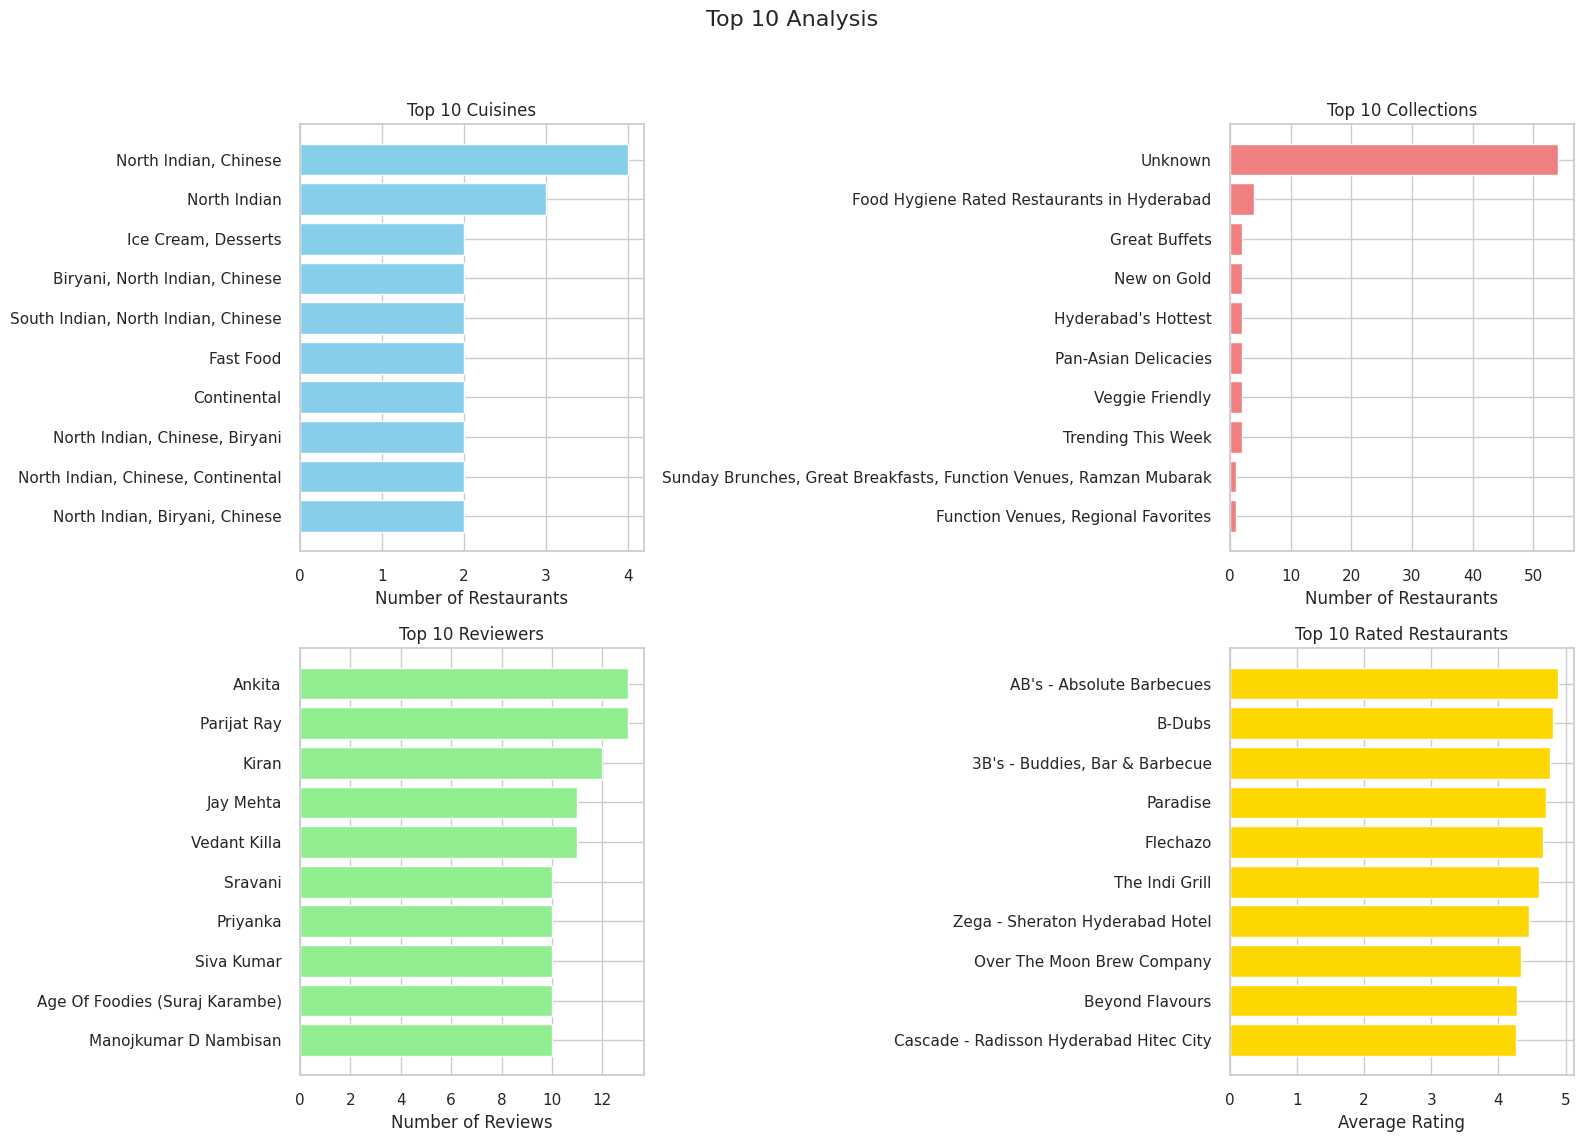

In [471]:
# Top 10 Cuisines
top_cuisines = zom_rest_name_df['Cuisines'].value_counts().head(10)

# Top 10 Collections
top_collections = zom_rest_name_df['Collections'].value_counts().head(10)

# Top 10 Reviewers
top_reviewers = zom_rest_review_df['Reviewer'].value_counts().head(10)

# Top 10 Rated Restaurants
top_rated_restaurants = zom_rest_review_df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Top 10 Analysis', fontsize=16)

# Horizontal bar chart for Top 10 Cuisines
axes[0, 0].barh(top_cuisines.index, top_cuisines, color='skyblue')
axes[0, 0].set_title('Top 10 Cuisines')
axes[0, 0].set_xlabel('Number of Restaurants')
axes[0, 0].tick_params(axis='y', rotation=0)
axes[0, 0].invert_yaxis()

# Horizontal bar chart for Top 10 Collections
axes[0, 1].barh(top_collections.index, top_collections, color='lightcoral')
axes[0, 1].set_title('Top 10 Collections')
axes[0, 1].set_xlabel('Number of Restaurants')
axes[0, 1].tick_params(axis='y', rotation=0)
axes[0, 1].invert_yaxis()

# Horizontal bar chart for Top 10 Reviewers
axes[1, 0].barh(top_reviewers.index, top_reviewers, color='lightgreen')
axes[1, 0].set_title('Top 10 Reviewers')
axes[1, 0].set_xlabel('Number of Reviews')
axes[1, 0].tick_params(axis='y', rotation=0)
axes[1, 0].invert_yaxis()

# Horizontal bar chart for Top 10 Rated Restaurants
axes[1, 1].barh(top_rated_restaurants.index, top_rated_restaurants, color='gold')
axes[1, 1].set_title('Top 10 Rated Restaurants')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].tick_params(axis='y', rotation=0)
axes[1, 1].invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



##### 1. Why did you pick the specific chart?

Bar charts were selected for each category—Top 10 Cuisines, Collections, Reviewers, and Rated Restaurants—because they provide a clear and concise representation of categorical data, facilitating easy comparison and analysis. The charts effectively display the frequency or average ratings in each category, making them suitable choices for the given visualization tasks.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 Cuisines:**

* **Insight:** The most popular cuisine is a combination of North Indian and Chinese, appearing in four instances. Other popular cuisines include Ice Cream and Desserts, Biryani, and Continental.

**Top 10 Collections:**

* **Insight:** The majority of restaurants fall under the "Unknown" collection, indicating a lack of specific categorization. "Food Hygiene Rated Restaurants in Hyderabad" and several other collections have fewer instances.

**Top 10 Reviewers:**

* **Insight:** Ankita and Parijat Ray are the top reviewers with 13 reviews each, followed by Kiran with 12 reviews. There is a relatively diverse group of reviewers contributing varying numbers of reviews.

**Top 10 Rated Restaurants:**

* **Insight:** AB's - Absolute Barbecues is the highest-rated restaurant with an average rating of 4.88. Other top-rated restaurants include B-Dubs, 3B's - Buddies, Bar & Barbecue, and Paradise. The ratings provide an overview of the most well-received restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

* Identifying the most popular cuisines can help restaurants tailor their menus to meet customer preferences, potentially attracting more patrons.
* Understanding top collections provides insights into effective marketing strategies or areas for improvement, contributing to a positive brand image.
* Recognizing and engaging with top reviewers can enhance customer relationships and loyalty.
* Knowing the highest-rated restaurants allows businesses to capitalize on their strengths and promote them to attract more customers.

**Negative Growth:**

* The prevalence of the "Unknown" collection suggests a lack of categorization, potentially leading to confusion or a perception of disorganization.
* Limited instances of specific collections may indicate a need for diversification or targeting specific customer segments to drive growth.
* If negative reviews are prominent among the top-rated restaurants, it could impact their reputation and customer trust, leading to a decline in business.

It's crucial for businesses to address potential areas for improvement, capitalize on strengths, and consistently monitor customer feedback to ensure sustained positive growth.

#### Chart - 2: Descriptive statistics and visualizations (box plots and histograms) for each numerical variable.

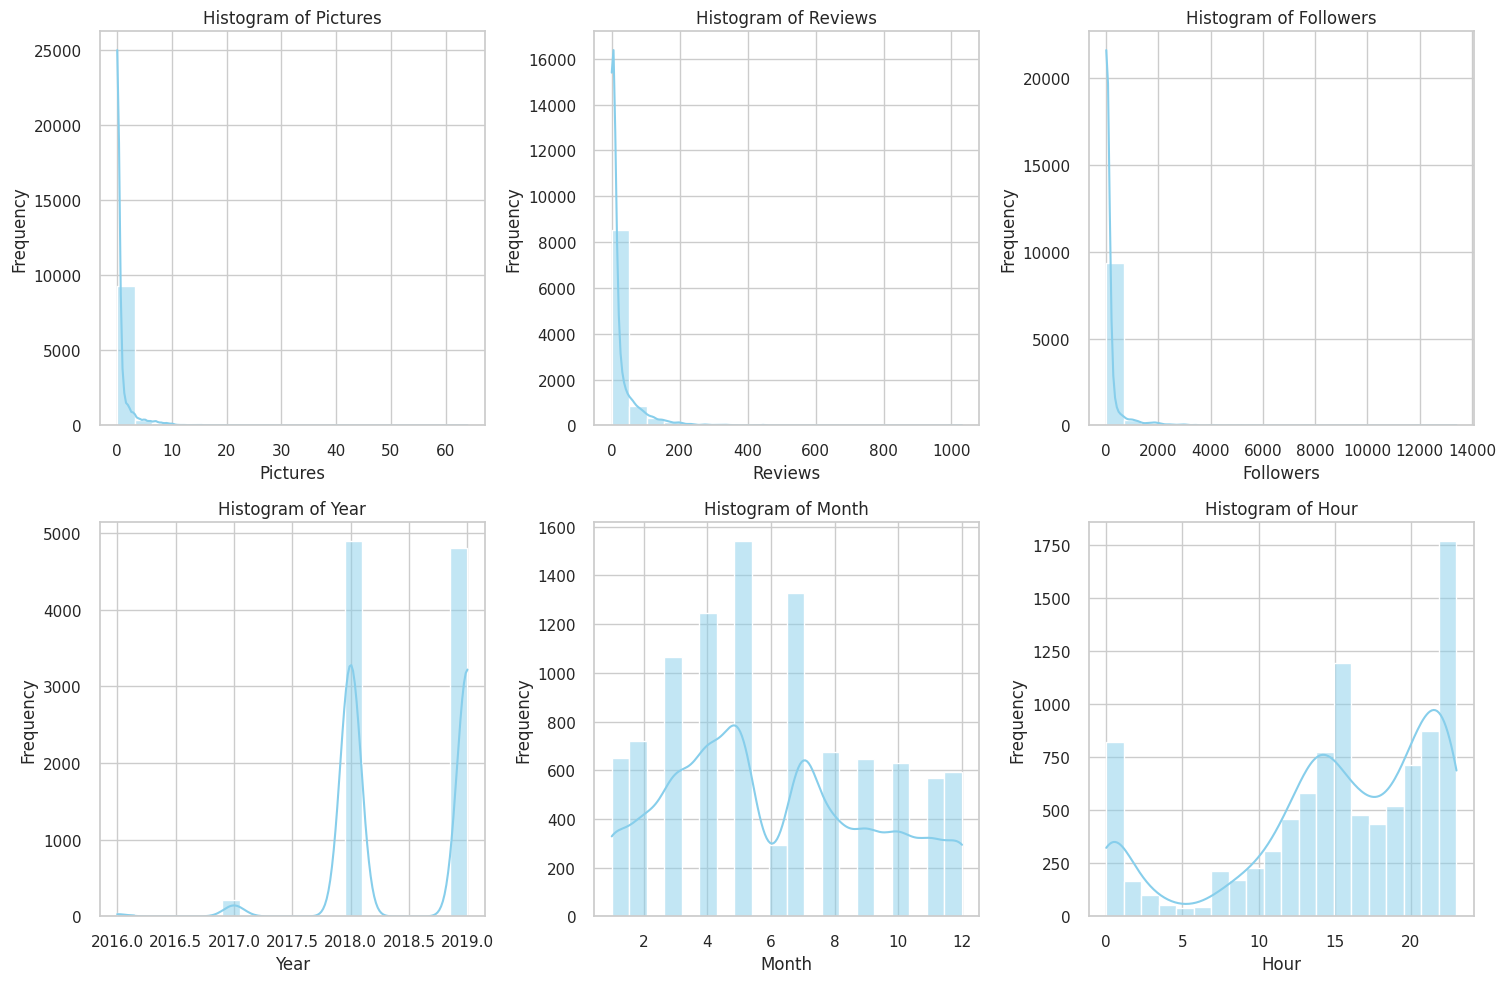

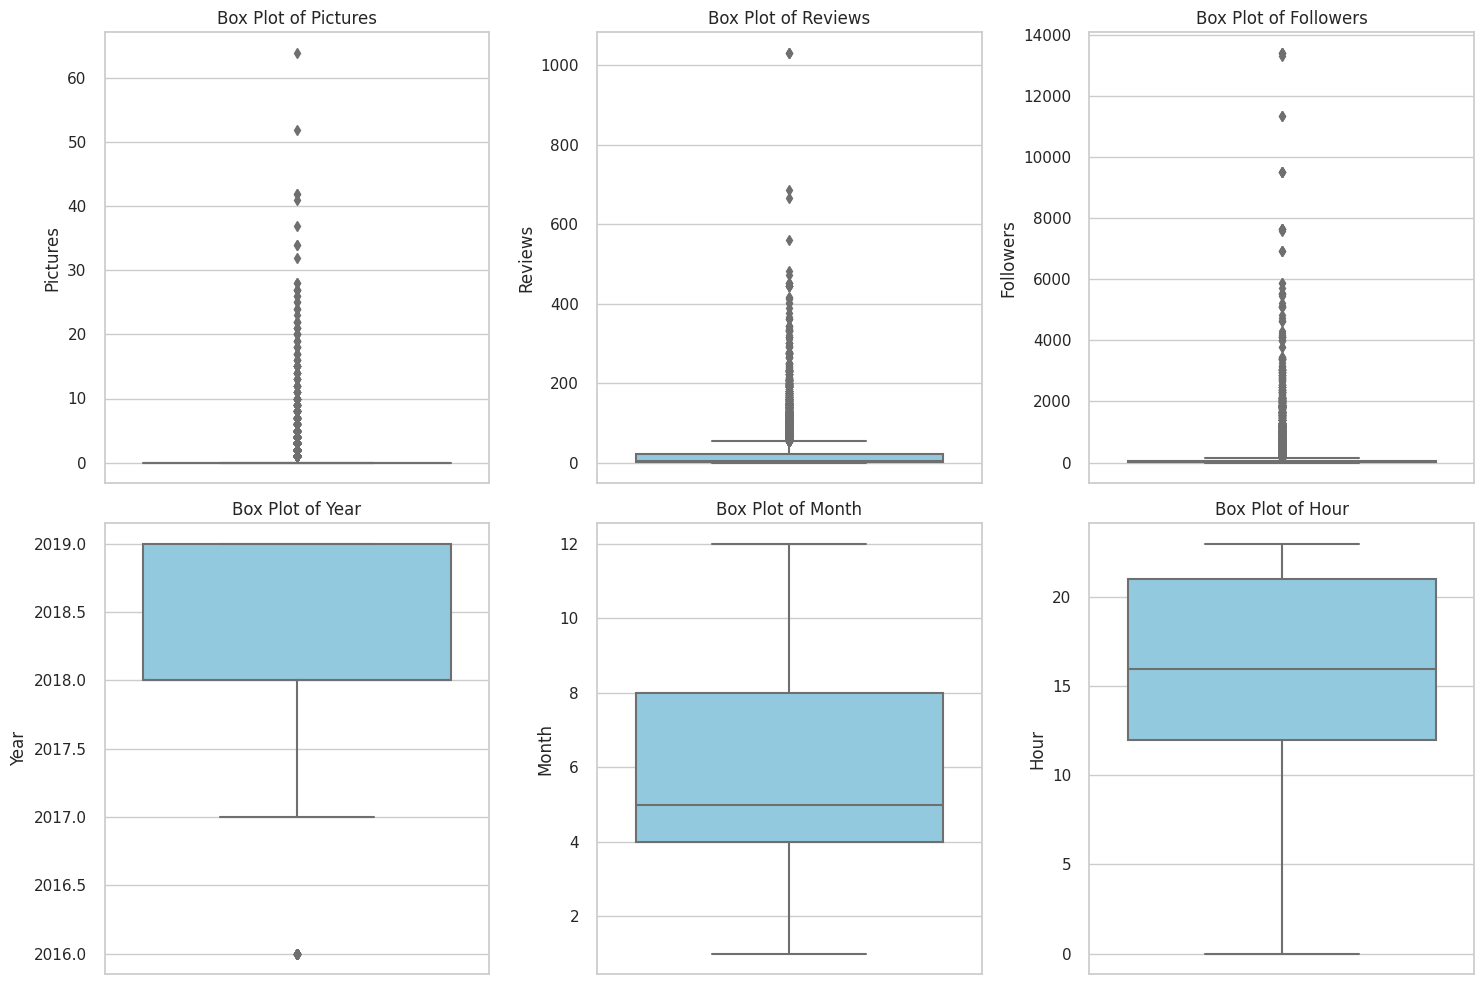

          Pictures      Reviews     Followers         Year        Month  \
count  9954.000000  9954.000000   9954.000000  9954.000000  9954.000000   
mean      0.751959    24.007937    163.122363  2018.452381     6.017079   
std       2.575819    50.631674    620.182806     0.562566     3.160515   
min       0.000000     0.000000      0.000000  2016.000000     1.000000   
25%       0.000000     1.000000      1.000000  2018.000000     4.000000   
50%       0.000000     4.000000      7.000000  2018.000000     5.000000   
75%       0.000000    22.000000     63.000000  2019.000000     8.000000   
max      64.000000  1031.000000  13410.000000  2019.000000    12.000000   

              Hour  
count  9954.000000  
mean     15.183946  
std       6.580345  
min       0.000000  
25%      12.000000  
50%      16.000000  
75%      21.000000  
max      23.000000  


In [472]:
# Descriptive statistics
numerical_variables = ['Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']
descriptive_stats = zom_rest_review_df[numerical_variables].describe()

# Plotting histograms for each numerical variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(zom_rest_review_df[variable], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots for each numerical variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=zom_rest_review_df[variable], color='skyblue')
    plt.title(f'Box Plot of {variable}')
    plt.ylabel(variable)

plt.tight_layout()
plt.show()

# Display descriptive statistics
print(descriptive_stats)

##### 1. Why did you pick the specific chart?


The choice of histograms and box plots for univariate analysis of numerical variables is based on their ability to reveal the distribution's shape, central tendency, spread, and identify outliers. Histograms offer a visual overview, while box plots provide a concise summary. Descriptive statistics complement visualizations by offering numerical insights into each variable's characteristics. Together, these methods provide a comprehensive understanding of the dataset's numerical features.

##### 2. What is/are the insight(s) found from the chart?


**Insights from the charts:**

1. **Pictures:** Most restaurants have few pictures, but some outliers have significantly more.

2. **Reviews:** The majority of restaurants have a low number of reviews, with a few having exceptionally high numbers.

3. **Followers:** A small number of restaurants have a substantial online following, while others have fewer followers.

4. **Year:** Data is concentrated around 2018 and 2019, requiring further investigation into potential trends during that period.

5. **Month:** Data is spread across months, with a peak in the middle months, indicating potential seasonal patterns.

6. **Hour:** Restaurants are open throughout the day, with a concentration around midday to early evening. Understanding peak hours can inform staffing and marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

1. Enhancing online presence with more pictures can attract customers.
2. Encouraging reviews improves online reputation and builds trust.
3. Increasing social media presence positively impacts brand awareness.
4. Tailoring strategies based on yearly and monthly trends optimizes marketing efforts.
5. Aligning operations with peak hours enhances customer service and revenue.

**Negative Growth:**

1. Neglecting to improve online visual appeal may result in missed opportunities.
2. Ignoring the importance of online reviews can lead to a negative perception.
3. Neglecting social media presence may result in reduced visibility.
4. Failing to address negative trends in specific years may hinder growth.
5. Ignoring seasonal trends may result in inefficient resource allocation and missed opportunities.
6. Neglecting to align operations with peak hours may lead to missed sales opportunities.

#### Chart - 3: The distribution of restaurant costs

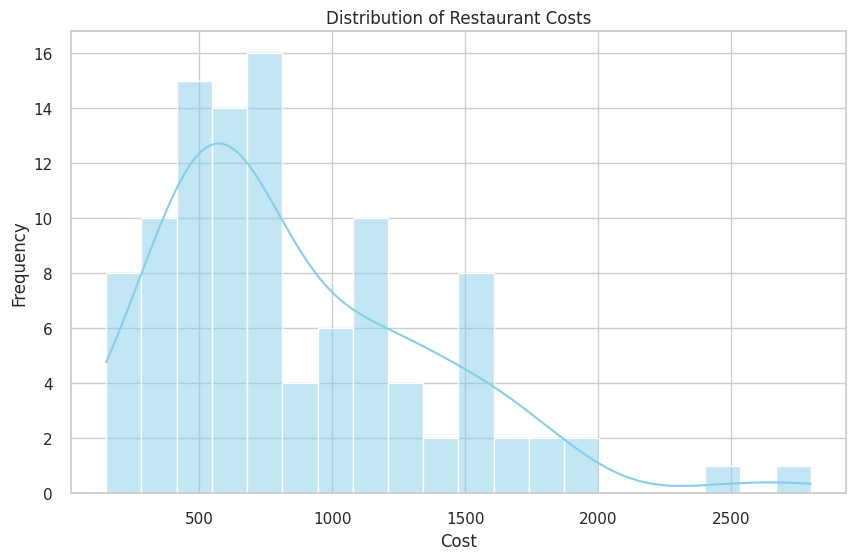

In [473]:
# Plotting the distribution of restaurant costs
plt.figure(figsize=(10, 6))
sns.histplot(zom_rest_name_df['Cost'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen for the 'Cost' variable because it is suitable for visualizing the distribution of numeric data, helping to understand the frequency and pattern of restaurant costs. The inclusion of a kernel density estimate provides a smoothed representation for additional insights.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that most restaurants have lower costs, forming a right-skewed distribution. However, two outliers stand out with significantly higher costs, possibly representing premium or luxury dining establishments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* **Affordable Options Dominant:** The insight that most restaurants have lower costs could attract a larger customer base, as affordability is often a positive factor for consumers. This may contribute to increased customer traffic and revenue.

* **Premium Options Stand Out:** The presence of higher-cost outliers could appeal to a niche market seeking premium dining experiences. Capitalizing on these high-end offerings might lead to increased revenue per customer and potentially attract a more affluent clientele.

**Potential Negative Growth:**

* **Limited Appeal for High-Cost Outliers:** Depending on the target market and local economic conditions, the presence of high-cost outliers might limit the customer base for those specific restaurants. If the majority of customers prefer affordable options, these outliers may struggle to attract a sustainable customer base, potentially leading to negative growth for those particular establishments.

It's crucial to consider the local market dynamics, customer preferences, and competition when interpreting insights. What might be a positive impact in one context could pose challenges in another. The business should align its strategies with the identified customer preferences and market demands to maximize positive impact and mitigate potential negative consequences.

#### Chart - 4: Top 10 Most Expensive and Least Expensive Restaurant

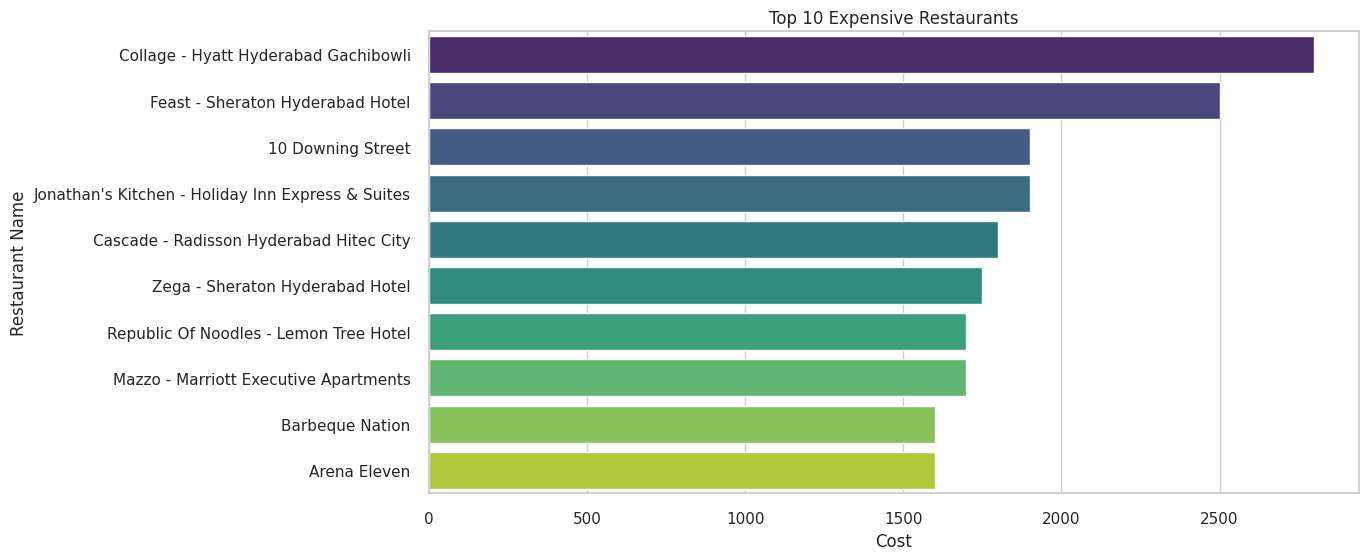

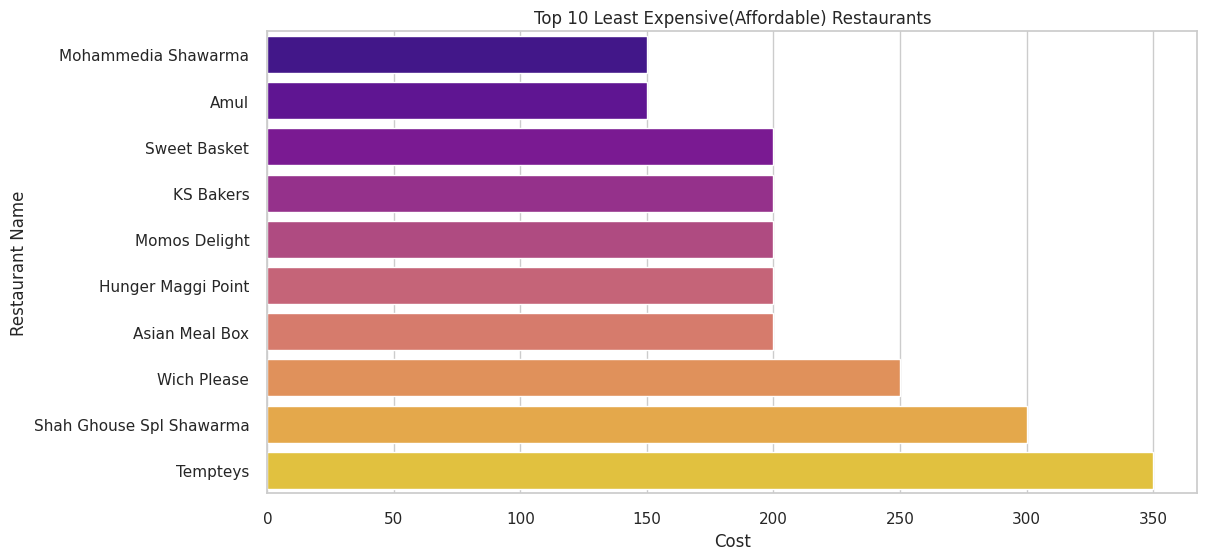

In [474]:
# changing 'Cost' column is in integer format
zom_rest_name_df['Cost'] = zom_rest_name_df['Cost'].astype(int)

# Group by 'Restaurant' and sum the 'Cost' for each restaurant
cost_by_restaurant = zom_rest_name_df[['Restaurant', 'Cost']].groupby('Restaurant', as_index=False).sum()

# Sort the dataframe by 'Cost' in descending order to get top 10 expensive
top_expensive = cost_by_restaurant.sort_values(by='Cost', ascending=False).head(10)

# Sort the dataframe by 'Cost' in ascending order to get top 10 least expensive
top_least_expensive = cost_by_restaurant.sort_values(by='Cost', ascending=True).head(10)

# Plotting the horizontal bar plot for top 10 expensive restaurants
plt.figure(figsize=(12, 6))
sns.barplot(y='Restaurant', x='Cost', data=top_expensive, palette='viridis')
plt.title('Top 10 Expensive Restaurants')
plt.xlabel('Cost')
plt.ylabel('Restaurant Name')
plt.show()

# Plotting the horizontal bar plot for top 10 least expensive restaurants
plt.figure(figsize=(12, 6))
sns.barplot(y='Restaurant', x='Cost', data=top_least_expensive, palette='plasma')
plt.title('Top 10 Least Expensive(Affordable) Restaurants')
plt.xlabel('Cost')
plt.ylabel('Restaurant Name')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a horizontal bar chart was based on its effectiveness in comparing magnitudes, especially for highlighting the top 10 expensive and least expensive restaurants. This chart type allows for clear display of restaurant names, efficient use of space, and consistency in presenting the information.

##### 2. What is/are the insight(s) found from the chart?

**Most Expensive Restaurants:**

* Emphasis on high-end dining experiences.
* Presence of luxury hotels, such as "Collage - Hyatt Hyderabad Gachibowli" and "Feast - Sheraton Hyderabad Hotel."
* Diverse cuisine options, including upscale choices like "Barbeque Nation" and "Republic Of Noodles - Lemon Tree Hotel."

**Least Expensive Restaurants:**

* Focus on affordable dining options.
* Diverse cuisine offerings, ranging from quick bites like "Sweet Basket" to local flavors like "Shah Ghouse Spl Shawarma."
* Inclusion of budget-friendly and quick-service establishments, such as "Mohammedia Shawarma" and "Amul."

The charts reveal a varied dining landscape with options catering to both high-end and budget-conscious customers, spanning different cuisines and dining styles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* **Diversification Opportunities:** Insights into diverse cuisine offerings allow for business diversification, attracting a broader customer base.
* **Targeted Marketing:** Understanding customer preferences enables targeted marketing strategies, enhancing customer engagement.
* **Operational Adjustments:** Tailoring operations based on insights can optimize service for different customer segments.

**Potential Challenges:**

* **High-End Competition:** Intense competition in the high-end market requires consistent exceptional experiences to justify premium pricing.
* **Price Sensitivity:** Budget-friendly options must manage costs and quality to address price sensitivity.
* **Market Saturation:** Oversaturation in certain categories may intensify competition, necessitating differentiation for success.

**Conclusion:**

Strategic planning based on insights can lead to positive impacts, but success depends on navigating challenges specific to the market and operational context.






#### Chart - 5: Word Clouds for Most Frequent Words Used for Most and Least Expensive Restaurants

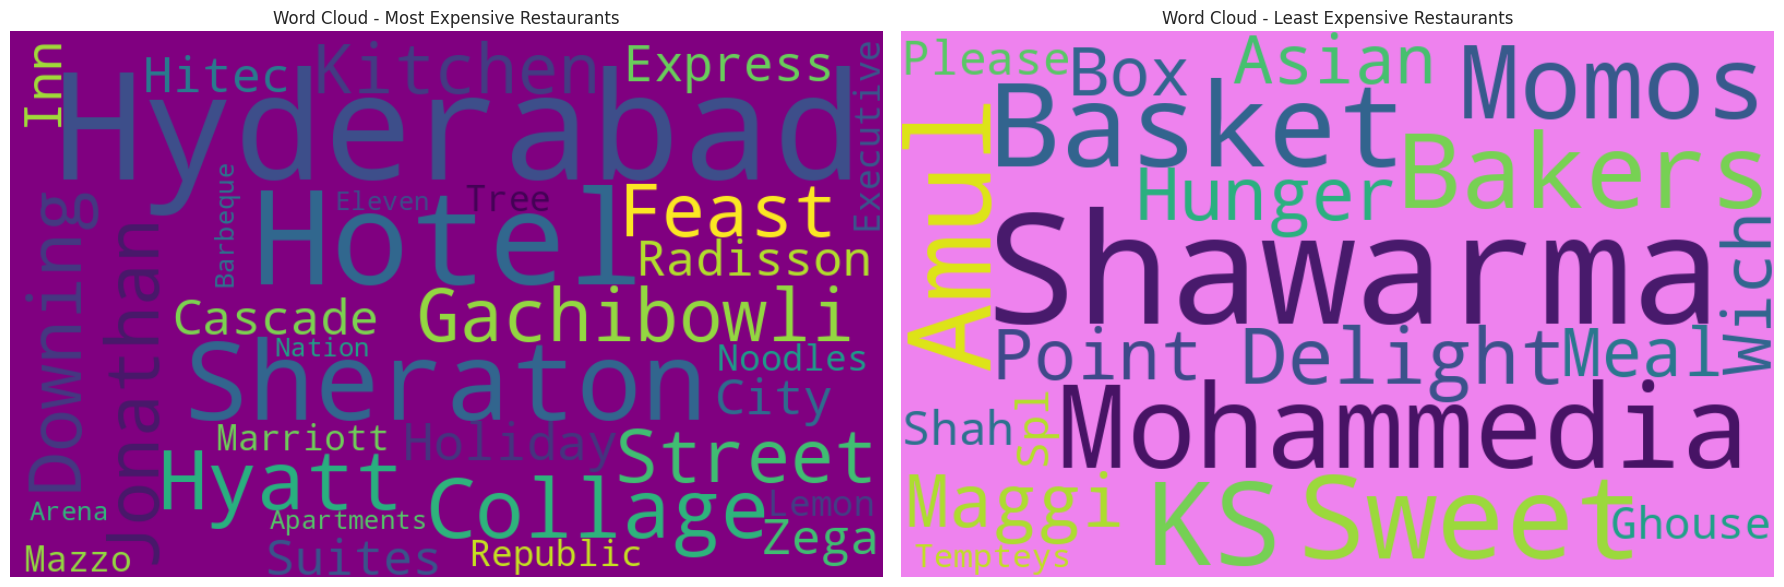

In [475]:
# Data for the most expensive and least expensive restaurants
most_expensive_words = ' '.join(top_expensive['Restaurant'])
least_expensive_words = ' '.join(top_least_expensive['Restaurant'])

# Create WordCloud for the most expensive restaurants
wordcloud_most_expensive = WordCloud(width=800, height=500, background_color='purple').generate(most_expensive_words)

# Create WordCloud for the least expensive restaurants
wordcloud_least_expensive = WordCloud(width=800, height=500, background_color='violet').generate(least_expensive_words)

# Plot WordClouds side by side
plt.figure(figsize=(18, 12))

# Plot WordCloud for the most expensive restaurants
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_most_expensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Expensive Restaurants')

# Plot WordCloud for the least expensive restaurants
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_least_expensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Least Expensive Restaurants')

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a word cloud chart is based on its effectiveness in visually representing the frequency of words, making it easy to interpret the most common restaurant names. Word clouds are space-efficient, engaging, and well-suited for textual data analysis, providing an intuitive way to compare and highlight the most prominent names in a side-by-side format.

##### 2. What is/are the insight(s) found from the chart?


**Most Expensive Restaurants:**

* **Brand Affiliation:** Presence of hotel names like 'Sheraton' and 'Hyatt,' indicating association with well-known brands.
* **Location Influence:** 'Hyderabad' and 'Gachibowli' suggest a concentration of expensive restaurants in specific areas.
* **Cuisine Diversity:** Inclusion of 'Barbeque Nation' and 'Republic Of Noodles' indicates a diverse range of cuisines.

**Least Expensive Restaurants:**

* **Shawarma Focus:** 'Shawarma' is prevalent, suggesting a focus on affordable eateries specializing in Shawarma.
* **Local and Quick Bites:** Words like 'Amul,' 'Maggi Point,' and 'Asian Meal Box' indicate an emphasis on local and quick-service options.
* **Diverse Options:** Inclusion of 'Sweet Basket' and 'KS Bakers' highlights a variety of food choices in the budget-friendly category.

**Overall Insights:**

* **Brand Affiliation:** High-end restaurants are associated with branded hotels, while budget-friendly options emphasize local and quick-service establishments.
* **Location Influence:** The location, including 'Hyderabad' and specific areas, plays a role in cost categorization.
* **Cuisine Diversity:** Both high-end and budget-friendly categories exhibit diversity in cuisine offerings, catering to varied tastes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* **Diversification Opportunities:** Cuisine diversity in both categories allows businesses to attract a broader customer base.
* **Local Focus for Affordability:** Prevalence of local and quick-service options in the budget-friendly category caters to budget-conscious consumers.
* **Strategic Branding:** Association of high costs with branded hotels provides opportunities for strategic branding and marketing efforts.

**Potential Challenges:**

* **Intense Competition in High-End Market:** Concentration of high-end restaurants associated with well-known hotels may lead to fierce competition, necessitating consistent exceptional experiences.
* **Local Market Saturation:** Focus on Shawarma and local quick bites in the budget-friendly category may lead to saturation, requiring businesses to differentiate themselves.
* **Location-Dependent Success:** Influence of location suggests success may be impacted by geographical factors, requiring careful assessment.

**Conclusion:**

While insights offer strategic opportunities, challenges like competition and market saturation require careful consideration and differentiation strategies for sustained success.

#### Chart - 6: The number of restaurants in each collection

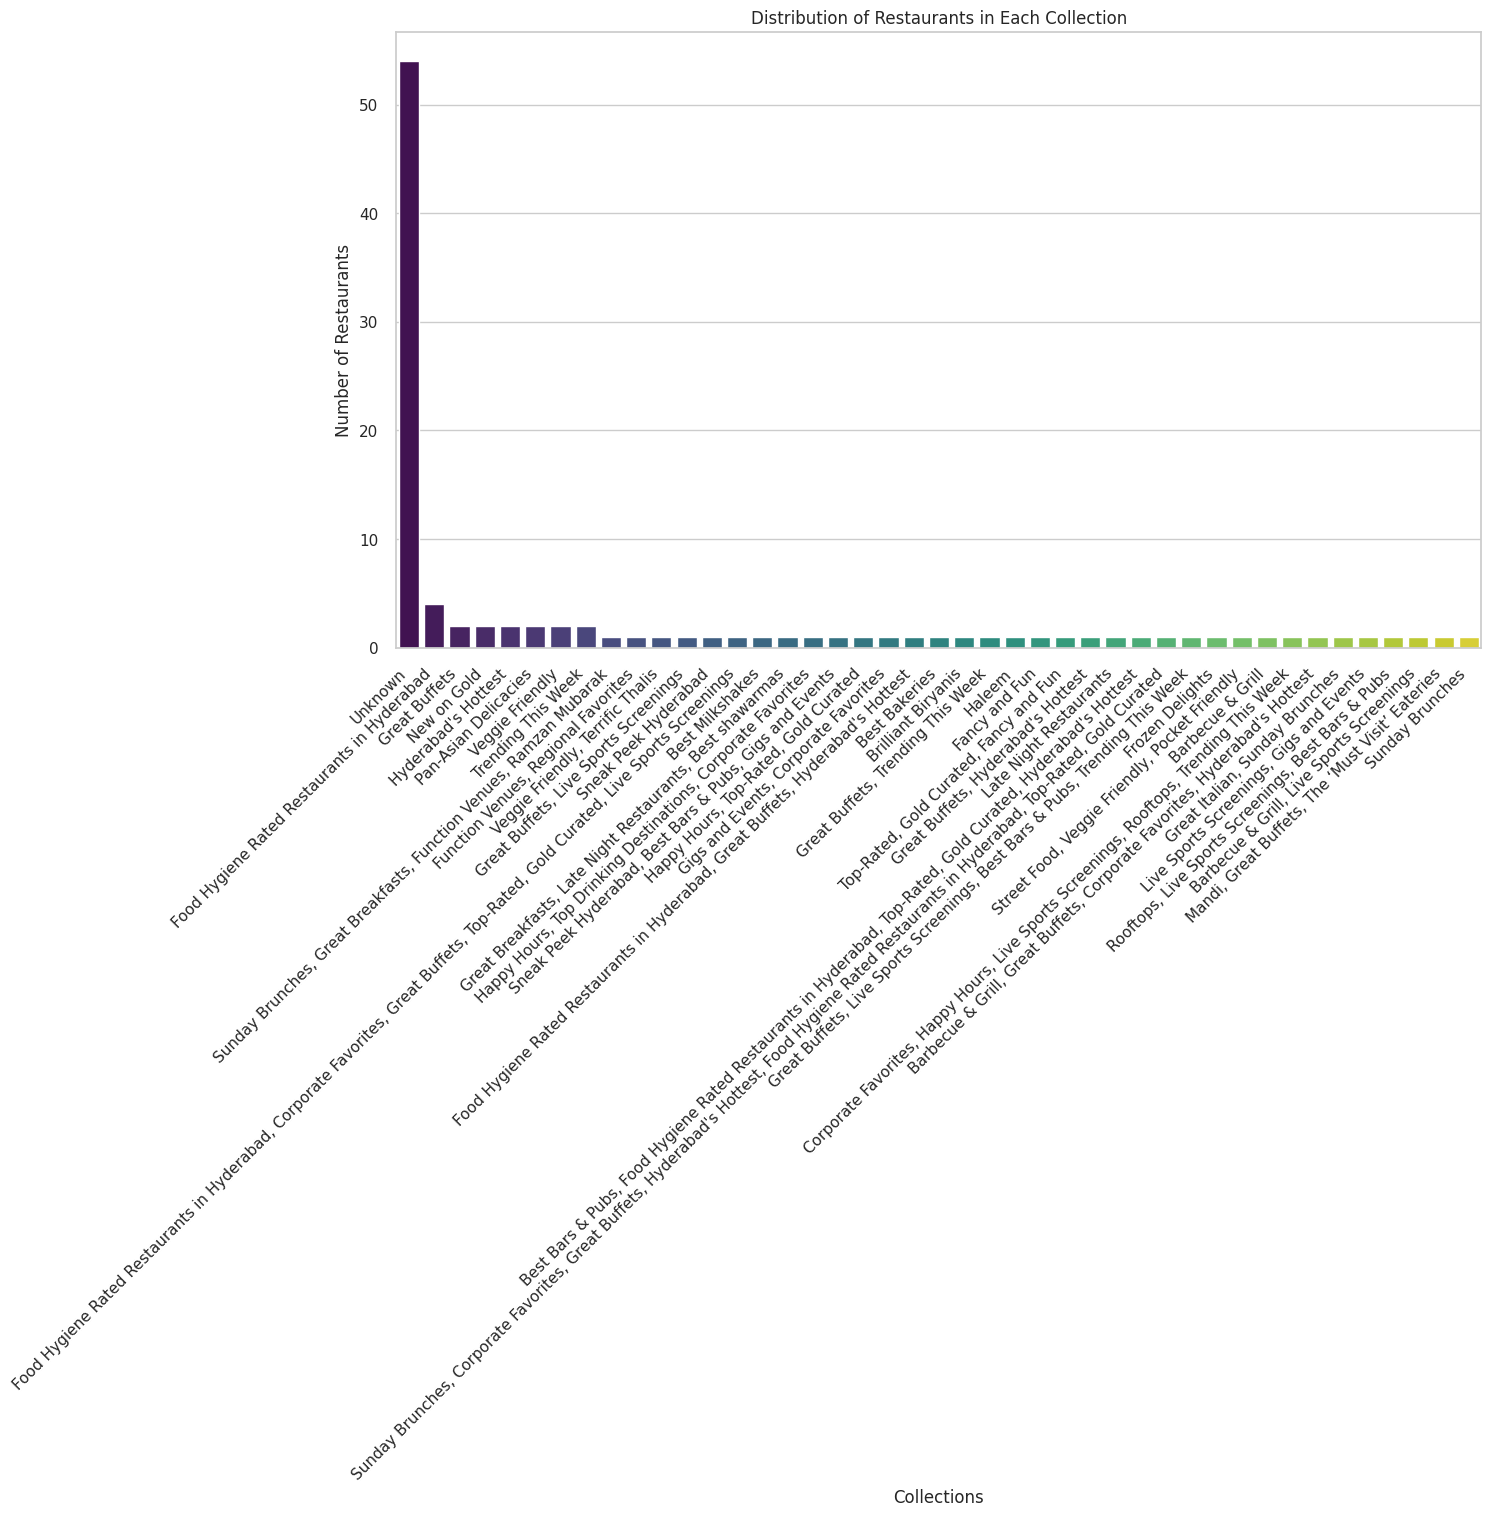

In [476]:
# Count the number of restaurants in each collection
collection_counts = zom_rest_name_df['Collections'].value_counts()

# Plotting the distribution of restaurants in each collection
plt.figure(figsize=(14, 8))
sns.barplot(x=collection_counts.index, y=collection_counts.values, palette='viridis')
plt.title('Distribution of Restaurants in Each Collection')
plt.xlabel('Collections')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen for the Collections Distribution because it effectively compares the count of restaurants in each collection, providing a clear visual representation of the distribution of categorical data. The choice is based on the categorical nature of the variable and the need to show the frequency of each collection in a readable and interpretable format.

##### 2. What is/are the insight(s) found from the chart?


**Insights from Collections Distribution:**

**1. Dominant "Unknown" Collection:**

* A significant number of restaurants have an "Unknown" collection, indicating a potential data gap or inconsistency.

**2. Specialized Offerings:**

* Collections highlight specific features like hygiene ratings, buffets, and cuisine types, showcasing diverse culinary offerings.

**3. Marketing Strategies:**

* Collections like "New on Gold" and "Trending This Week" suggest marketing strategies to promote new and trending restaurants.

**4. Diverse Venues:**

* Collections cater to various preferences, from function venues to bars, reflecting a diverse range of restaurant types.

**5. Hyderabad-Specific Themes:**

* Collections referencing Hyderabad indicate a focus on local preferences and trends.

**6. Gold Curated:**

* Presence of "Gold Curated" suggests the inclusion of restaurants in loyalty programs, potentially influencing customer choices.

**7. Culinary Themes:**

* Specific culinary themes like biryanis, barbecue, and Italian cuisine showcase the diversity of available cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**1. Effective Marketing Strategies:**

Insights into strategies like "Trending This Week" and "New on Gold" can boost customer acquisition and engagement.

**2. Specialized Offerings:**

Highlighting offerings like "Great Buffets" can enhance customer satisfaction and loyalty.

**3. Diverse Venues:**

Offering diverse venues caters to various preferences, potentially increasing customer base and satisfaction.

**4. Gold Curated Program:**

Inclusion in a "Gold Curated" program may attract premium-seeking customers, increasing spend and loyalty.

**Potential Negative Growth:**

**1. Dominant "Unknown" Collection:**

The prevalence of "Unknown" collections may hinder targeted marketing and lead to missed opportunities, potentially resulting in negative growth.

**2. Incomplete Data:**

Incomplete or inaccurate data may hinder effective marketing and result in customer dissatisfaction, leading to negative growth.

**3. Culinary Themes:**

Relying heavily on certain culinary themes may limit appeal, potentially leading to negative growth if a diverse customer base is not attracted.

#### Chart - 7: Word cloud and bar chart to visualize the most popular cuisines.

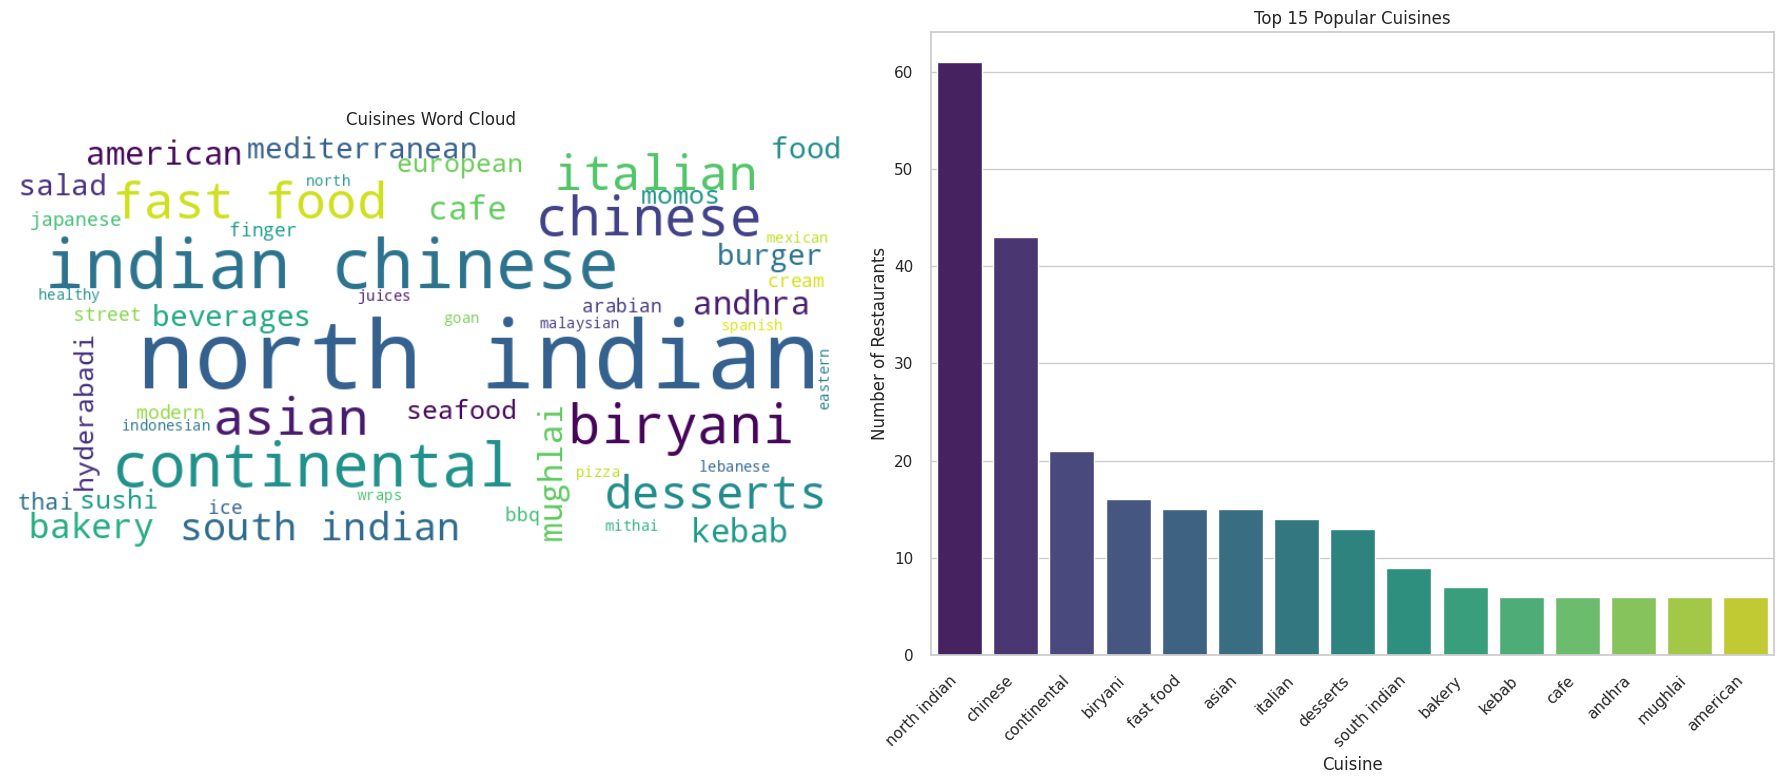

In [477]:
# Combine all cuisines into a single string
all_cuisines = ' '.join(zom_rest_name_df['Cuisines'].astype(str).str.lower())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cuisines)

# Plot the word cloud
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisines Word Cloud')

# Split and count the individual cuisines
cuisine_counts = zom_rest_name_df['Cuisines'].str.lower().str.split(', ').explode().value_counts()

# Plot the bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=cuisine_counts.head(15).index, y=cuisine_counts.head(15).values, palette='viridis')
plt.title('Top 15 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Word Cloud:**

* **Nature of Data:** Visualizes the diversity of cuisines data with varying font sizes based on frequency.

* **Insights:** Intuitively explores the variety and prevalence of different cuisines.

**Bar Chart:**

* **Nature of Data:** Represents the frequency of each cuisine category in a straightforward manner.

* **Insights:** Allows for direct comparison and identifies the top cuisines quantitatively.

**Combined Approach:**

* **Comprehensive View:** Word cloud and bar chart together provide a holistic and visually appealing exploration of the cuisines distribution.
* **Insights:** Reveals both the diversity and the top cuisines within the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Insights from Cuisines Distribution:**

**1. Dominant Cuisines:**

* North Indian and Chinese: Most prevalent, with North Indian cuisine being the most dominant.

**2. Diverse Offerings:**

* Continental, Biryani, Fast Food, Asian, Italian: Reflect a diverse range of culinary offerings.

**3. Regional Specialties:**

* South Indian, Andhra, Hyderabadi: Highlight regional specialties and local flavors.

**4. Global Cuisine Presence:**

* American, Mediterranean, European, Sushi, Thai: Indicates an international culinary influence and diverse taste preferences.

**5. Specialized Categories:**

* Desserts, Bakery, Kebab, Cafe, Momos, Seafood: Cater to specific preferences and occasions.

**6. Moderate Presence:**

* Japanese, Arabian, Ice Cream, Street Food, BBQ: Indicates a moderate, niche presence.

**7. Less Common Cuisines:**

* Modern Indian, North Eastern, Mithai, Indonesian, Juices: Represent less common, potentially niche choices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**1. Popular Cuisines Attraction:**

* Leveraging popular cuisines like North Indian and Chinese can attract a broader customer base, positively impacting footfall and revenue.

**2. Diverse Offerings Appeal:**

* Offering a diverse range of cuisines caters to varied preferences, potentially attracting a larger audience and enhancing overall customer satisfaction.

**3. Specialized Categories Advantage:**

* Highlighting specialized categories creates a unique selling proposition, attracting customers seeking specific culinary experiences and contributing to positive growth.

**4. Regional Specialties Recognition:**

* Emphasizing regional specialties aligns with local preferences, potentially fostering positive customer sentiment and loyalty.

**Considerations Leading to Negative Growth:**

**1. Overemphasis on Niche Cuisines:**

* Overemphasizing less common cuisines without understanding local demand may lead to negative growth due to limited customer appeal.

**2. Failure to Understand Regional Preferences:**

* Ignoring or misinterpreting regional preferences may result in dissatisfaction and negative growth in specific markets.

**3. Monotony in Dominant Cuisines:**

* Relying solely on dominant cuisines without offering variety may lead to customer boredom and reduced loyalty, impacting growth negatively.

**4. Ineffective Marketing of Specialized Categories:**

* Poor marketing of specialized categories may result in missed opportunities, negatively affecting growth potential within specific customer segments.

#### Chart - 8: Distribution of Ratings

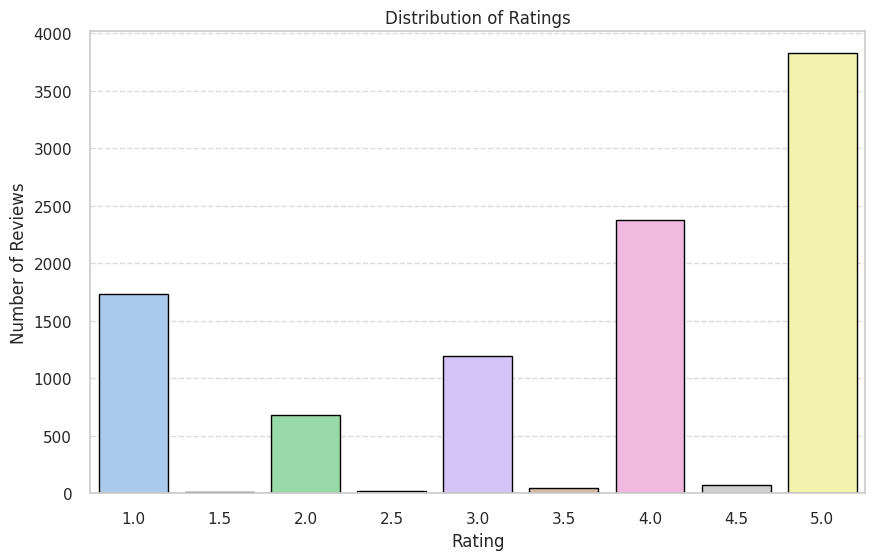

In [478]:
# Define a colorful palette
color_palette = sns.color_palette("pastel")

# Plotting the count plot with a colorful palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=zom_rest_review_df, palette=color_palette, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram for the distribution of ratings because it effectively displays the frequency of ratings in different bins, offering insights into the spread of ratings, summary statistics, and easy interpretation. Its simplicity and ability to reveal patterns make it suitable for showcasing the overall distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1. **Dominant Rating:** Majority of reviews have a rating of 5, indicating a prevalent positive sentiment and overall satisfaction.

2. **Positive Sentiment:** Concentration at higher ratings (4 and 5) suggests a positive sentiment dominating the reviews.

3. **Distribution Shape:** Right-skewed distribution implies more high ratings compared to lower ratings.

4. **Moderate and Lower Ratings:** Presence of reviews with ratings 3 and below indicates areas for potential improvement or specific issues.

5. **Review Volume:** Varying bar heights reflect review volume at different ratings, with a substantial number at 4.

6. **Engagement Levels:** The chart provides insights into customer engagement at different rating levels, highlighting areas of interest for further analysis and improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. **Enhanced Satisfaction:** Recognizing positive sentiment (rating of 5) informs strategies to maintain and improve customer satisfaction.

2. **Strengths Identification:** Dominant positive sentiment highlights key strengths, allowing businesses to capitalize on successful aspects.

3. **Targeted Improvement:** Insights into moderate and lower ratings present opportunities for focused improvements, addressing specific customer concerns.

4. **Informed Decision-Making:** Detailed analysis guides informed decision-making on resource allocation and strategic initiatives.

**Considerations for Negative Growth:**

1. **Risk of Negative Reviews:** Unresolved issues in lower ratings may lead to more negative reviews, impacting overall reputation.

2. **Competitive Disadvantage:** Failure to address concerns may result in a competitive disadvantage, with competitors attracting dissatisfied customers.

3. **Customer Churn Risk:** Unresolved issues pose a risk of customer churn, as dissatisfied customers may choose competitors offering a better experience.

4. **Missed Opportunities:** Neglecting areas for improvement may lead to missed business opportunities and hinder innovation, affecting overall growth.

#### Chart - 9: Distribution of Reviews Over Time

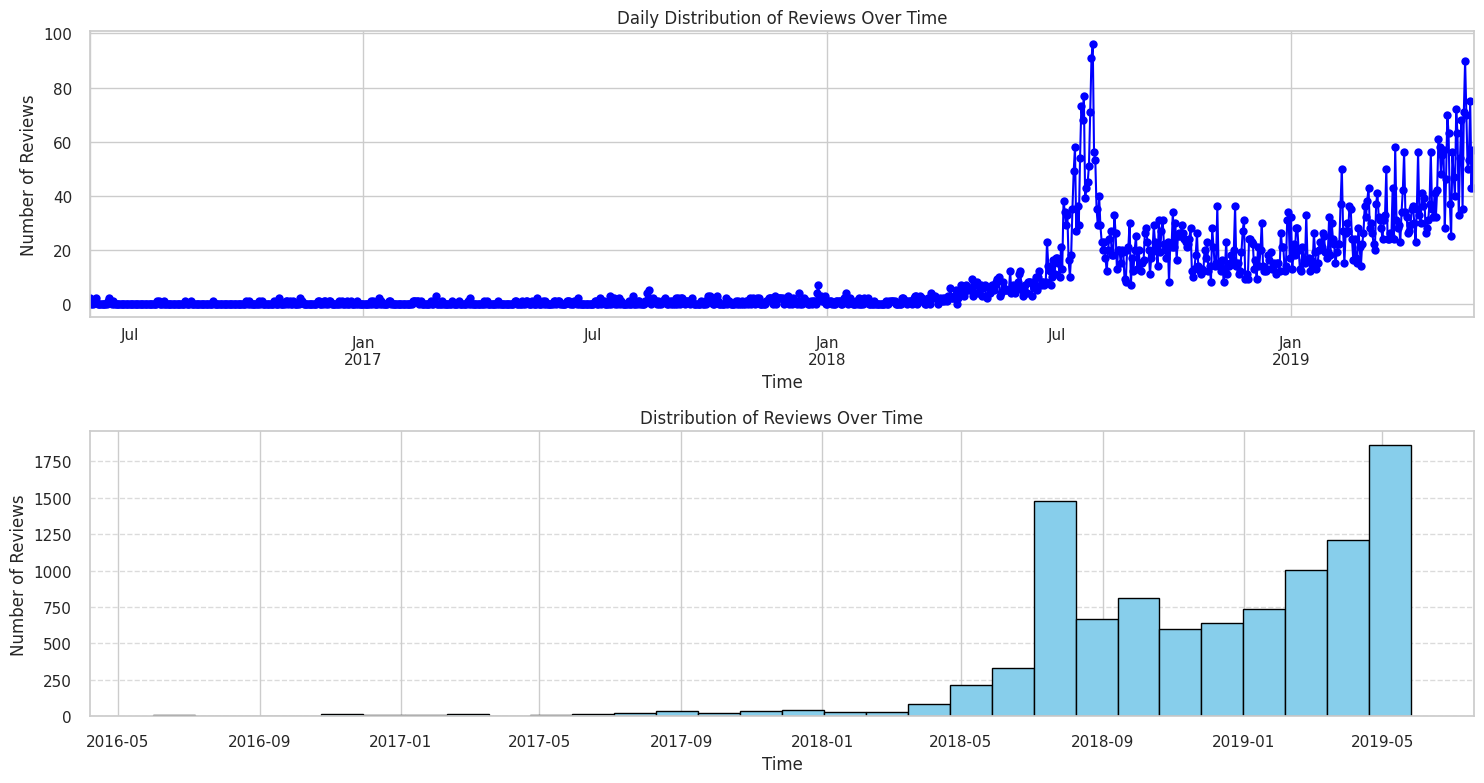

In [479]:
# Set 'Time' as the index for time-based analysis
zom_rest_review_df.set_index('Time', inplace=True)

# Resample data to daily frequency and count the number of reviews per day
reviews_per_day = zom_rest_review_df.resample('D').size()

# Plotting the line chart
plt.figure(figsize=(15, 8))

# Line chart for time trends
plt.subplot(2, 1, 1)
reviews_per_day.plot(color='blue', marker='o')
plt.title('Daily Distribution of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(True)

# Histogram for time distribution
plt.subplot(2, 1, 2)
plt.hist(zom_rest_review_df.index, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Line Chart for Time Trends:**

* A line chart is effective for visualizing trends over time. It helps in identifying patterns, seasonality, or any notable changes in the number of reviews over different time periods. The upward or downward trend can provide insights into the overall review activity.

**Histogram for Time Distribution:**

* A histogram is suitable for displaying the distribution of events within specific time intervals. It provides a clear view of when most reviews are concentrated.

By using both charts, we get a comprehensive understanding of both the temporal trends and the distribution of reviews over time. The line chart gives a sense of how the overall review activity evolves, while the histogram provides insights into specific time intervals with higher or lower review frequencies.

##### 2. What is/are the insight(s) found from the chart?

Insights:

**1. Left-Skewed Distribution (2016-05 to 2019-05):**

* Majority of reviews occurred in the earlier period, indicating the platform's growth and popularity during that time.

**2. Significant Spike in July 2018:**

* Sharp increase in reviews during July 2018 suggests a noteworthy event or promotion that led to heightened user activity.

**3. Subsequent Drop and Gradual Recovery:**

* Following the peak in July 2018, a drop in reviews occurred, followed by a slow recovery. The drop indicates the temporary nature of the surge.

**4. Seasonal or Event-Driven Patterns:**

* Fluctuations may be influenced by seasonal or event-driven patterns, with potential impact on user behavior.

**5. Strategic Insights for Businesses:**

* Businesses can analyze trends to identify successful strategies during peak periods, informing future marketing efforts and business planning.

**6. User Engagement Optimization:**

* Understanding user engagement dynamics helps businesses optimize strategies and adapt to changing patterns, improving overall effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Understanding user engagement dynamics is crucial for positive impact. Insights from the July 2018 surge enable strategic planning and replication of successful strategies. Recognizing peak engagement times allows targeted marketing, enhancing positive outcomes. Adapting to changing user behavior ensures relevance, meeting expectations, and sustaining growth.

**Considerations for Negative Growth:**

Dependency on temporary factors, like the one-time surge, poses a risk of negative growth if not addressed. Prolonged low engagement periods may result in user disinterest. Failure to adapt strategies to evolving user behavior and unidentified causes of fluctuations can hinder growth. Regular analysis and adaptability are essential for navigating challenges and maintaining positive business impact.

#### Chart - 10: Distribution of the Cost of Restaurants Against Their Ratings

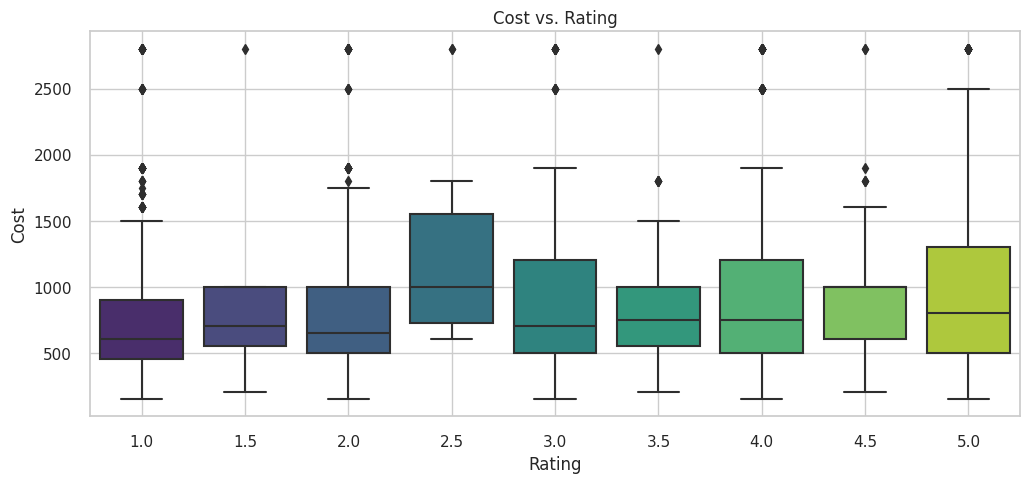

In [480]:
# Merge the two DataFrames on the common key 'Name'
merged_df = pd.merge(zom_rest_name_df, zom_rest_review_df, on='Restaurant', how='inner')

# Assuming 'Cost' is a numerical column and 'Rating' is a categorical column
numerical_column = 'Cost'
categorical_column = 'Rating'

# Boxplot for Numerical - Categorical Analysis
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_column, y=numerical_column, data=merged_df, palette='viridis')
plt.title(f'{numerical_column} vs. {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen for its effectiveness in visually representing the distribution of restaurant costs across different ratings. It provides a concise summary of key statistics, handles outliers well, facilitates easy comparison between categories, and is widely recognized for its interpretability. Additionally, it complements the analysis by offering a clear overview of the cost distribution for each rating category.

##### 2. What is/are the insight(s) found from the chart?

The summary statistics reveal a trend of increasing mean and median costs with higher ratings, suggesting that higher-rated restaurants generally have higher costs. There is growing variability in costs within higher ratings, with consistent median costs in the top three rating categories. Rating 1 stands out with lower and more consistent costs. The wider interquartile range in higher ratings implies potential outliers with exceptionally high costs in those categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11: Analyzing Time of Reviews and Ratings and Exploring the Correlation with Review Length

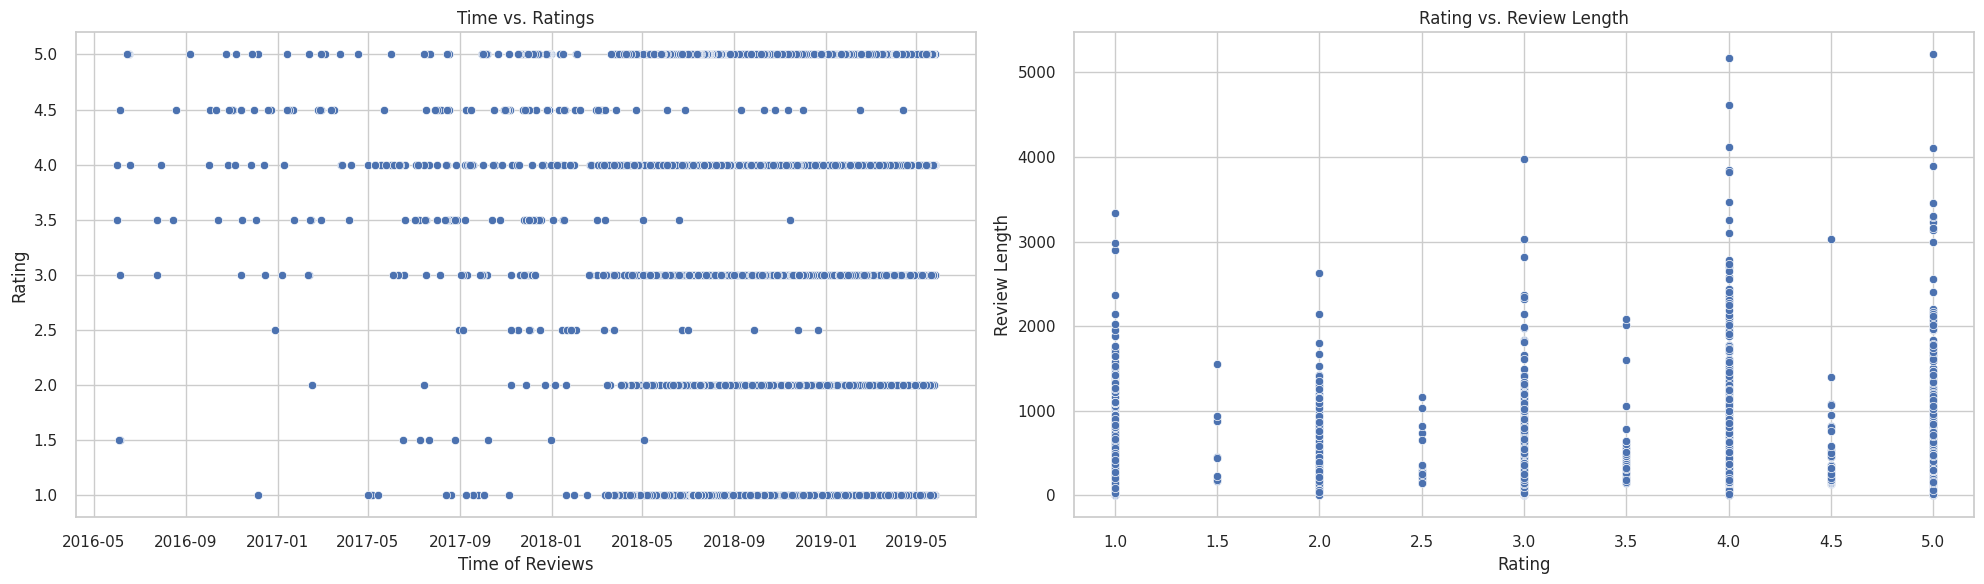

In [481]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Scatter plot for Time vs. Ratings
sns.scatterplot(x='Time', y='Rating', data=zom_rest_review_df, palette='viridis', ax=axes[0])
axes[0].set_title('Time vs. Ratings')
axes[0].set_xlabel('Time of Reviews')
axes[0].set_ylabel('Rating')
axes[0].grid(True)

# Scatter plot for Rating vs. Review Length
sns.scatterplot(x='Rating', y=zom_rest_review_df['Review'].apply(lambda x: len(str(x))), data=zom_rest_review_df, palette='viridis', ax=axes[1])
axes[1].set_title('Rating vs. Review Length')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Review Length')
axes[1].grid(True)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


Scatter plots were chosen for their effectiveness in visualizing relationships between numerical variables. The 'Time vs. Ratings' plot explores how review times relate to ratings, while the 'Rating vs. Review Length' plot investigates the correlation between ratings and the length of reviews. Scatter plots are well-suited for displaying data distributions and identifying patterns in relationships.

##### 2. What is/are the insight(s) found from the chart?

**1. Insights from 'Time vs. Ratings' Scatter Plot:**

* The highest concentration of reviews corresponds to a rating of 4.
* The majority of reviews across all ratings (1 to 5) are concentrated within the time range from March 2018 to June 2019. This period might have witnessed increased customer engagement or a surge in restaurant activities.

**2. Insights from 'Rating vs. Review Length' Scatter Plot:**

* The majority of reviews, regardless of the rating, have a length falling within the range of 0 to 2000 on the y-axis. This suggests that most reviews are relatively concise in terms of character count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

* Peak concentration at a rating of 4 suggests emphasizing positive aspects associated with this rating in marketing.
* Time trends (March 2018 to June 2019) can guide targeted strategies for increased customer engagement during specific periods.

**Negative Growth Consideration:**

* No inherent negative growth is indicated, but caution is needed not to misinterpret patterns.
* Business should ensure concise reviews don't mask potential issues, and continuous improvement efforts remain a priority.

#### Chart - 12: The relationship between restaurant collections and cuisines.

<Figure size 1600x800 with 0 Axes>

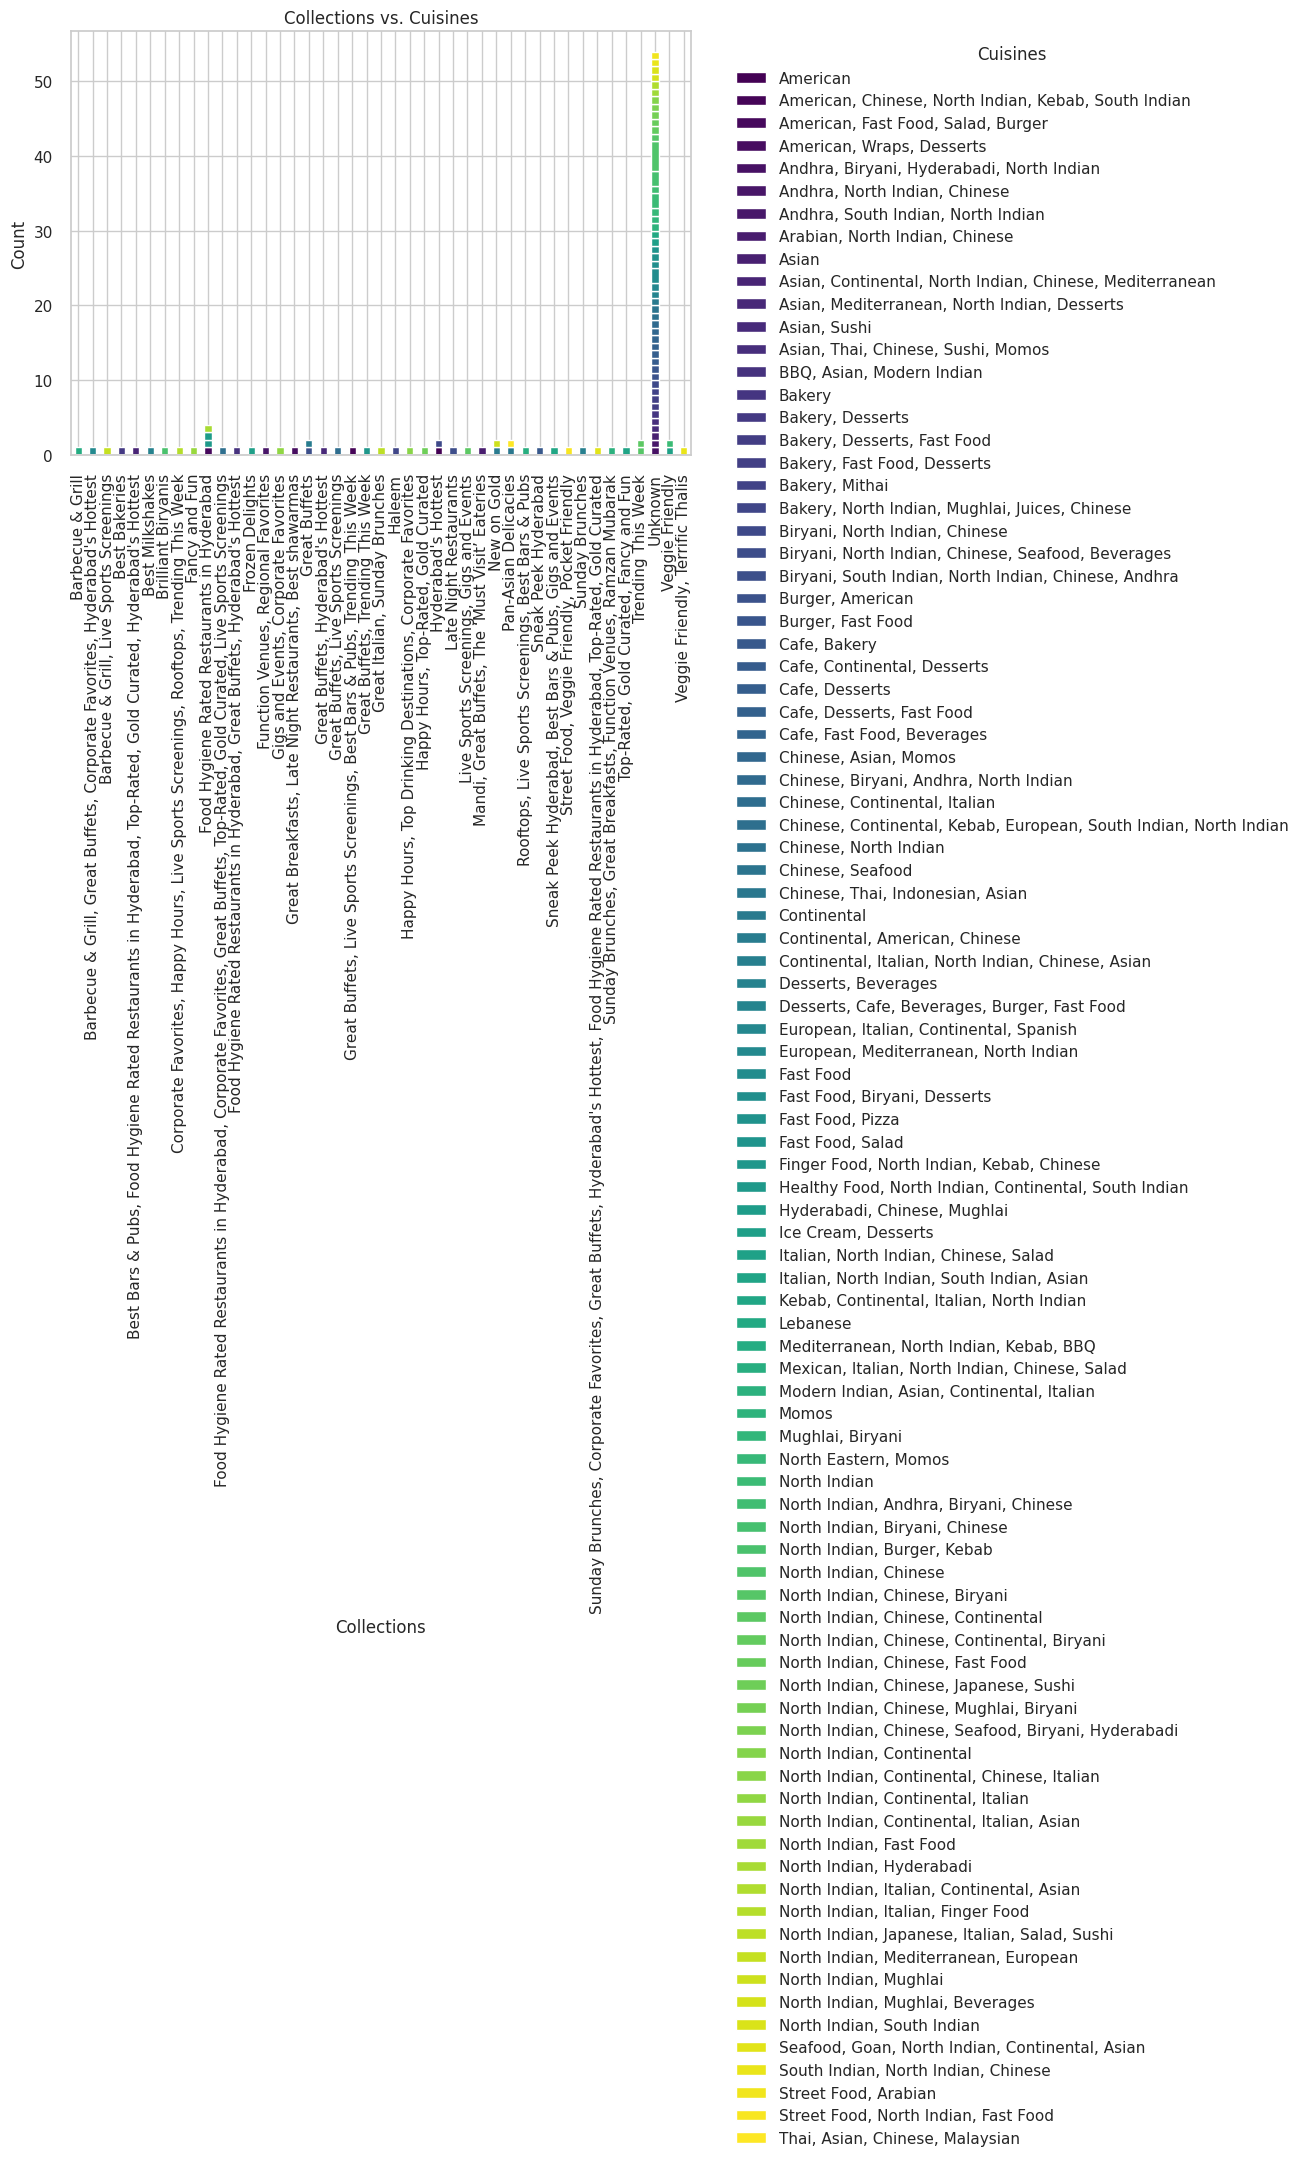

In [482]:
# Create a contingency table for Collections vs. Cuisines
contingency_table = pd.crosstab(zom_rest_name_df['Collections'], zom_rest_name_df['Cuisines'])

# Plotting a stacked bar chart
plt.figure(figsize=(16, 8))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Collections vs. Cuisines')
plt.xlabel('Collections')
plt.ylabel('Count')
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart was chosen to visually represent the relationship between restaurant collections and cuisines. This chart effectively compares the total count of restaurants in each collection while showcasing the distribution of cuisines within each collection. The stacked format facilitates easy interpretation and comparison of multiple categories, making it suitable for visualizing the categorical data in this context.

##### 2. What is/are the insight(s) found from the chart?


**Insights from the Chart:**

**1. Unknown Collection:**

* The "Unknown" collection has a diverse representation, indicating a wide variety of cuisines. This could suggest a lack of specific categorization or a mix of different types of restaurants.

**2. Food Hygiene Rated Restaurants in Hyderabad:**

* The collection labeled "Food Hygiene Rated Restaurants in Hyderabad" shows a distinctive pattern with bars representing cuisines such as American, Chinese, North Indian, and others. This suggests a specialization in various international and regional cuisines within restaurants emphasizing food hygiene.

**3. Other Collections:**

* Collections other than "Unknown" and "Food Hygiene Rated Restaurants in Hyderabad" display one or two color bars, indicating a more focused range of cuisines. This may suggest a specific theme or culinary focus for these collections.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* **Diversification Opportunities:** "Unknown" collection can market diverse cuisines for a broader customer base.

* **Hygiene Specialization:** "Food Hygiene Rated Restaurants in Hyderabad" can leverage hygiene focus for positive customer perceptions.

**Negative Growth:**

* **Limited Representation:** Collections with few cuisines may struggle to attract a diverse customer base.
* **Uncertainty in "Unknown" Collection:** Lack of clarity may hinder customer preference.

#### Chart - 13: 'Rating' vs 'Followers' vs 'Year':

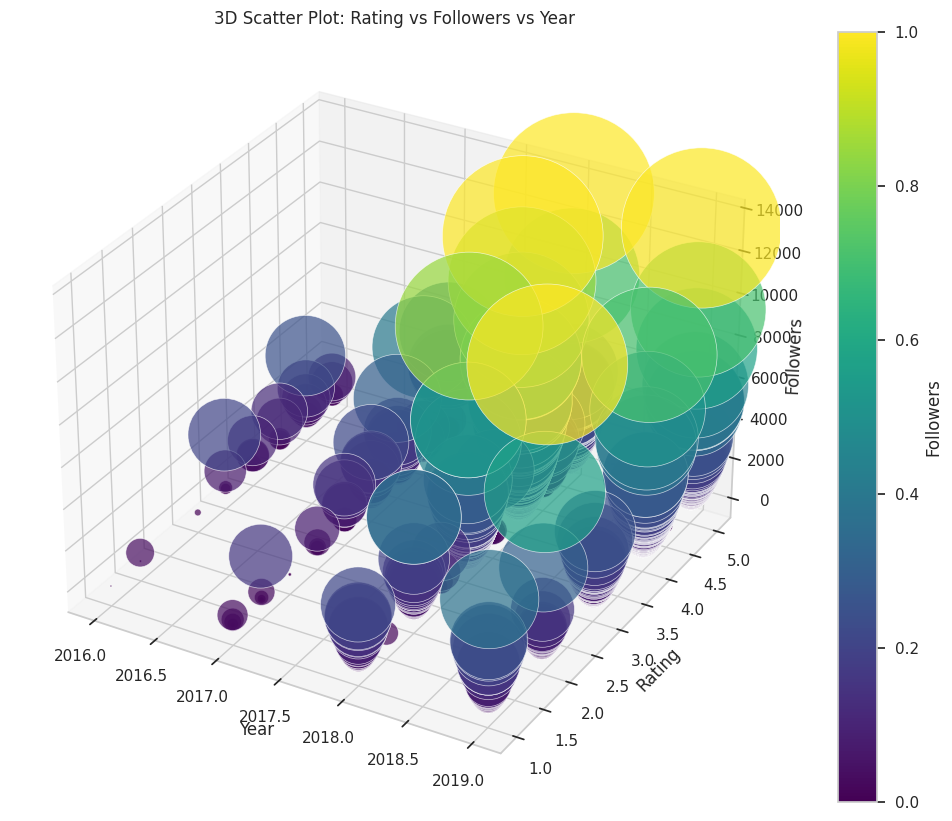

In [483]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Rating' vs 'Followers' vs 'Year'
ax.scatter(zom_rest_review_df['Year'], zom_rest_review_df['Rating'], zom_rest_review_df['Followers'], s=zom_rest_review_df['Followers'],
           c=zom_rest_review_df['Followers'], cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
ax.set_zlabel('Followers')
ax.set_title('3D Scatter Plot: Rating vs Followers vs Year')

# Show colorbar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.set_label('Followers')

plt.show()


##### 1. Why did you pick the specific chart?


I chose a 3D scatter plot for 'Rating' vs 'Followers' vs 'Year' because it effectively represents the relationships among these three continuous variables. The 3D plot provides depth, allowing simultaneous visualization of how 'Rating' and 'Followers' vary with 'Year.' The inclusion of bubble size and color mapping enhances the plot's informativeness, making it visually intuitive for understanding patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?


The chart suggests a positive trend where both followers and ratings increase as the year progresses from 2016 to 2019. Insights include potential business growth, a positive correlation between followers and ratings, and the need for a yearly analysis to identify contributing factors. This indicates the importance of aligning strategies with observed trends for improved online performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. **Improved Strategies:** Insights suggesting a positive correlation between followers, ratings, and time can inform strategic decisions.
2. **Enhanced Marketing:** Understanding the yearly trends allows for targeted marketing efforts, potentially attracting more customers.
3. **Customer Engagement:** Recognizing the correlation between online popularity and positive ratings may prompt improved customer engagement practices.

**Potential Challenges and Negative Growth:**

1. **Overreliance on Online Metrics:** Relying solely on online metrics (followers, ratings) may overlook other crucial aspects of the business, such as in-person customer experiences, food quality, or operational efficiency.

2. **Risk of Misinterpretation:** While a positive correlation is observed, it's crucial not to assume causation. Ratings and followers may increase for various reasons, and misinterpretation could lead to misguided strategies.

3. **Ignoring Negative Trends:** Focusing solely on positive trends might lead to neglecting negative trends or challenges that need attention. For instance, if there are specific years or periods of decline, they should be investigated to address potential issues.

4. **Influence of External Factors:** Changes in economic conditions, local competition, or external events could impact the observed trends. Ignoring these external factors may limit the effectiveness of strategies.

5. **Potential for Bias:** Online metrics can be influenced by various biases, such as review manipulation or trends in online platforms. Relying solely on these metrics without considering potential biases may result in skewed insights.

In summary, while the insights offer opportunities for positive impact, it's crucial to approach them with a comprehensive understanding of the business landscape. Careful consideration of potential challenges, a holistic view of business performance, and a willingness to adapt strategies based on a nuanced understanding will contribute to sustainable growth.

#### Chart - 14 - Correlation Heatmap

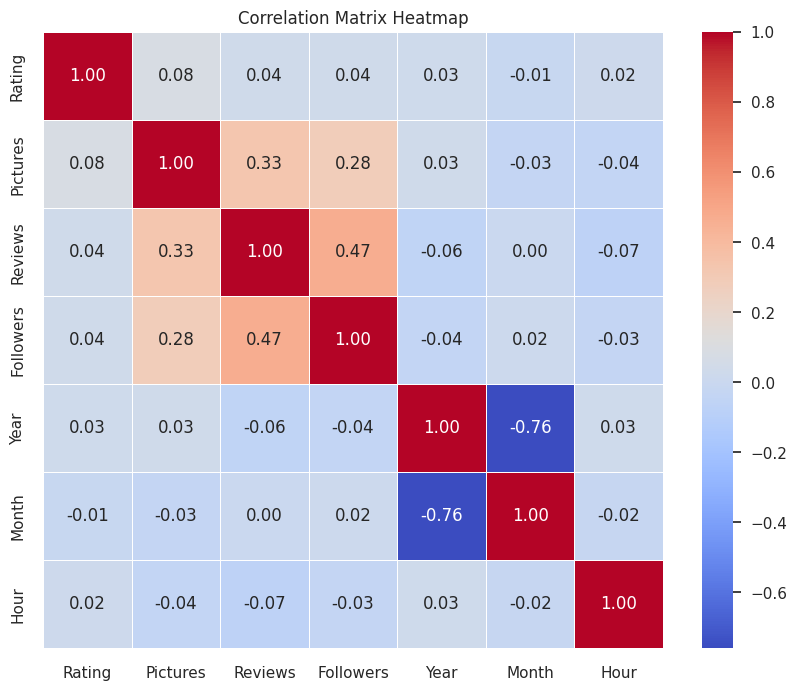

In [484]:
# Selecting numerical variables
numerical_columns = ['Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']
correlation_matrix = zom_rest_review_df[numerical_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation matrix heatmap to visualize relationships between numerical variables ('Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour) for several reasons: it handles multiple variables, shows strength and direction of correlations with colors, provides precise numerical insights, is easy to interpret, and aids in identifying issues like multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

1. **Rating and Pictures:**
   - Weak positive correlation (0.0828).
   - Restaurants with more pictures tend to have slightly higher ratings.

2. **Rating and Reviews:**
   - Very weak positive correlation (0.0353).
   - Ratings are minimally influenced by the number of reviews.

3. **Rating and Followers:**
   - Very weak positive correlation (0.0356).
   - Restaurants with more followers may have slightly higher ratings.

4. **Year and Month:**
   - Strong negative correlation (-0.7583).
   - Indicates a clear pattern: as the year increases, the month tends to decrease.

5. **Reviews and Pictures:**
   - Moderate positive correlation (0.3309).
   - Restaurants with more pictures attract more reviews.

6. **Reviews and Followers:**
   - Moderate positive correlation (0.4656).
   - Restaurants with more followers tend to receive more reviews.

7. **Month and Hour:**
   - Very weak negative correlation (-0.0195).
   - Minimal evidence of a clear pattern between month and hour.

#### Chart - 15 - Pair Plot

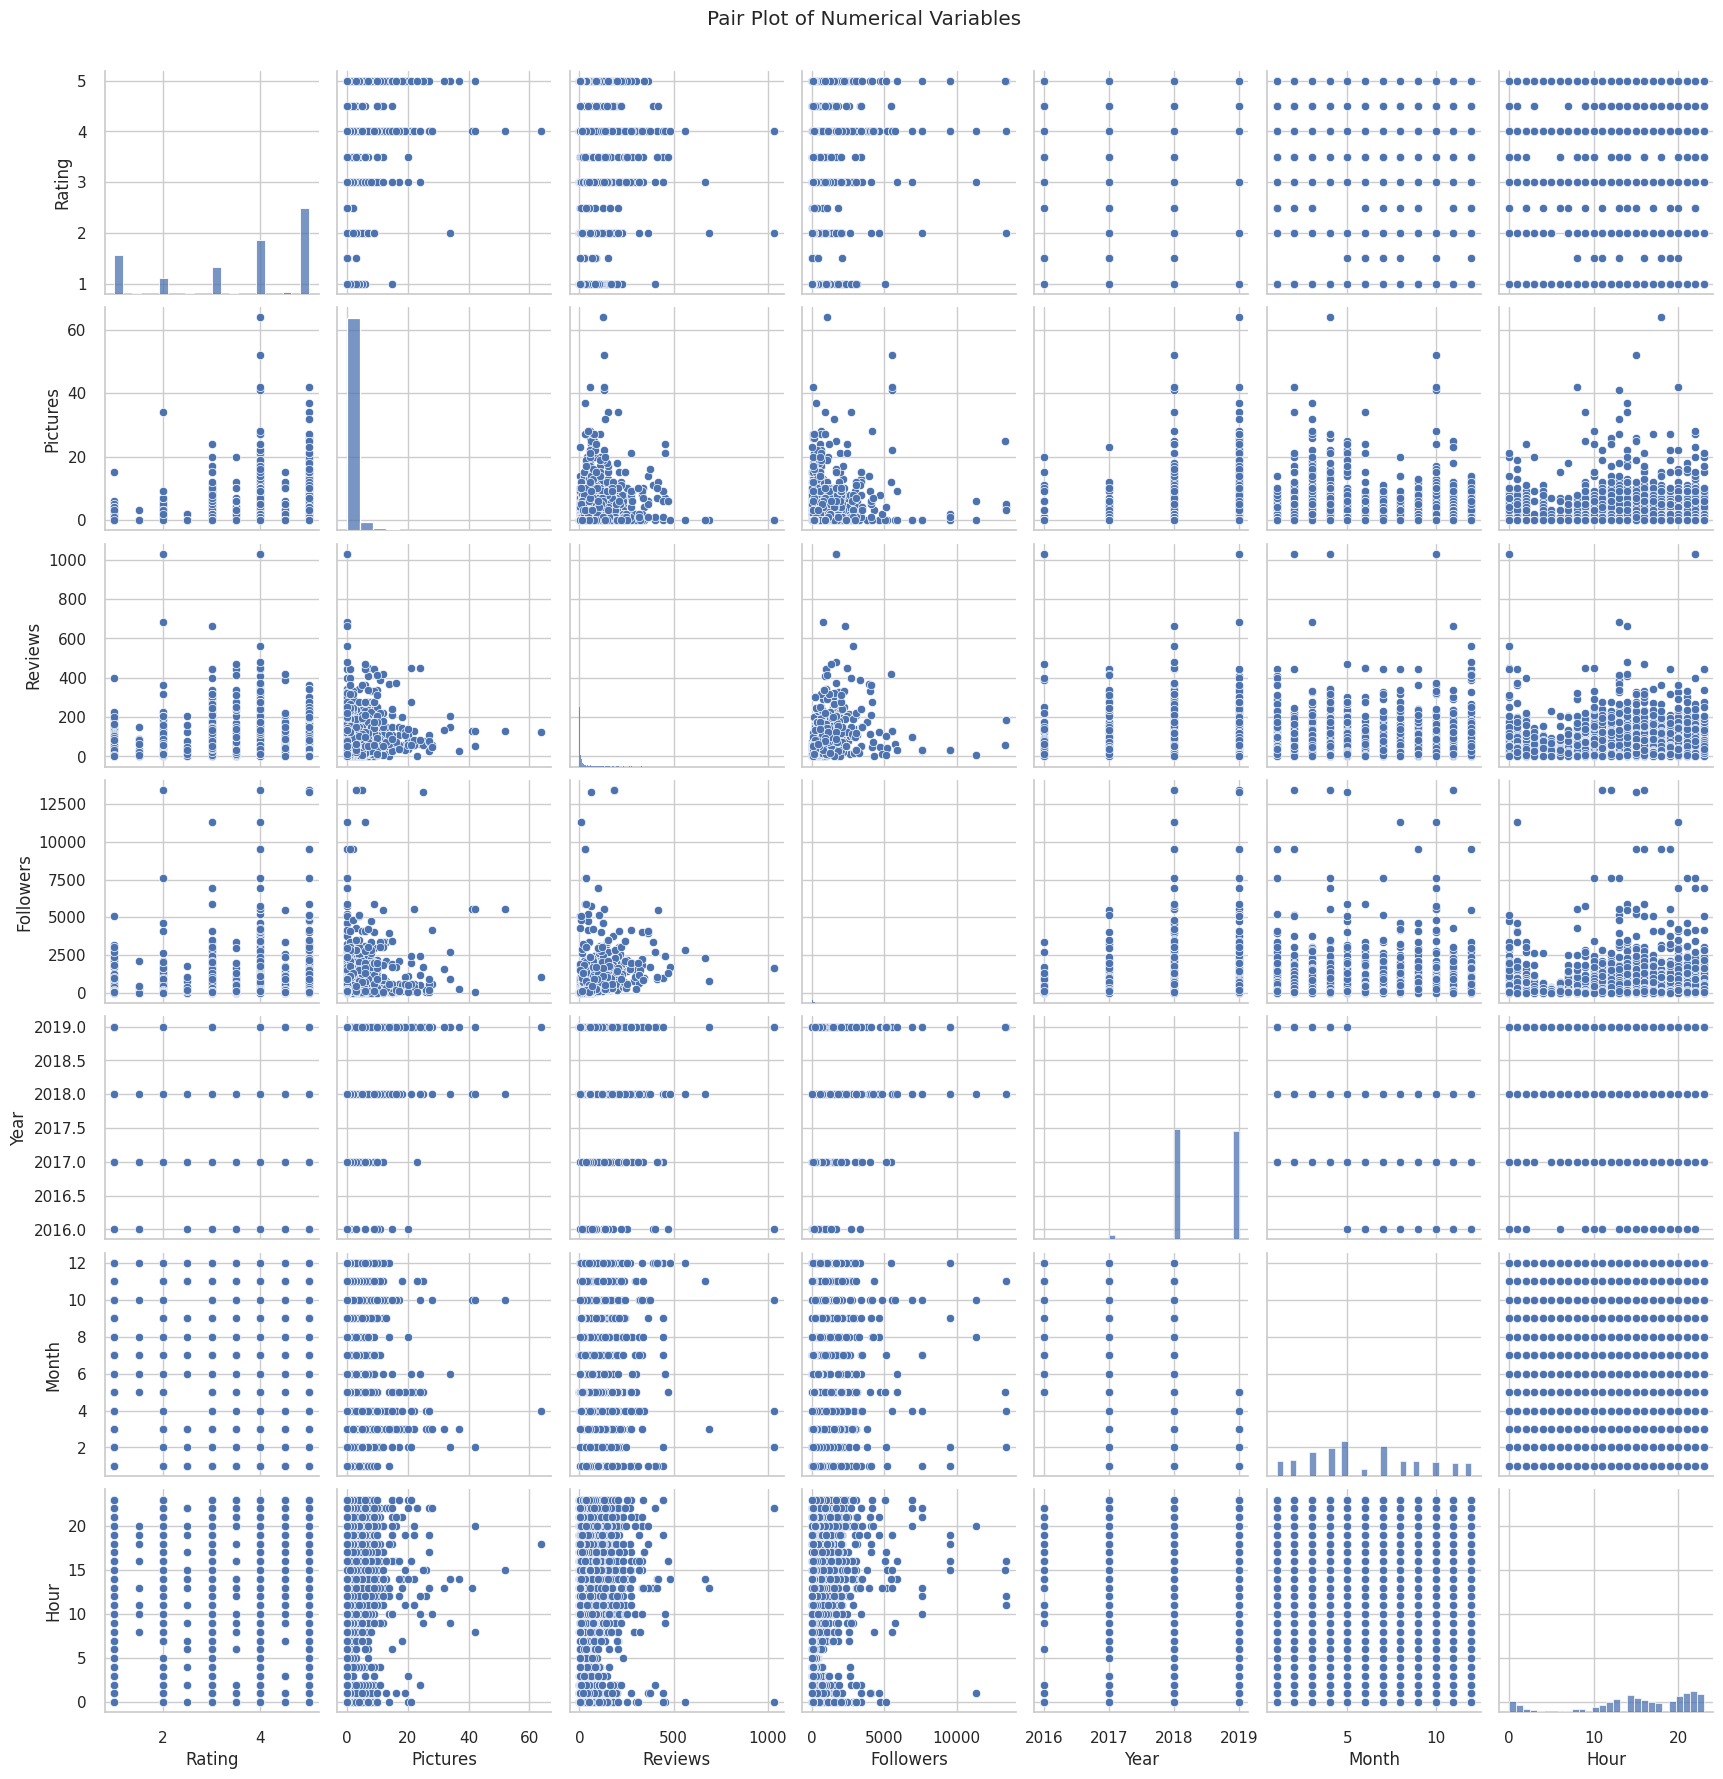

In [485]:
# Selecting numerical variables
numerical_columns = ['Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']
pair_plot_data = zom_rest_review_df[numerical_columns]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot for a comprehensive exploration of relationships between numerical variables. It combines scatterplots and histograms to reveal bivariate relationships, distributions, and patterns. The inclusion of correlation coefficients aids in understanding the strength and direction of relationships, providing a holistic view of interactions between different variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [486]:
# Counting the missing values in zom_rest_name_df
zom_rest_name_df.isnull().sum()

Restaurant     0
Cost           0
Collections    0
Cuisines       0
Timings        1
dtype: int64

In [487]:
zom_rest_name_df = zom_rest_name_df.dropna(subset=['Timings'])

In [488]:
# Counting the missing values in zom_rest_review_df
zom_rest_review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The Restaurant name dataframe has only 1 missing value in the Timing column so I removed the row by using the 'dropna' method.
The Reataurant review dataframe has no missing values.

### 2. Handling Outliers

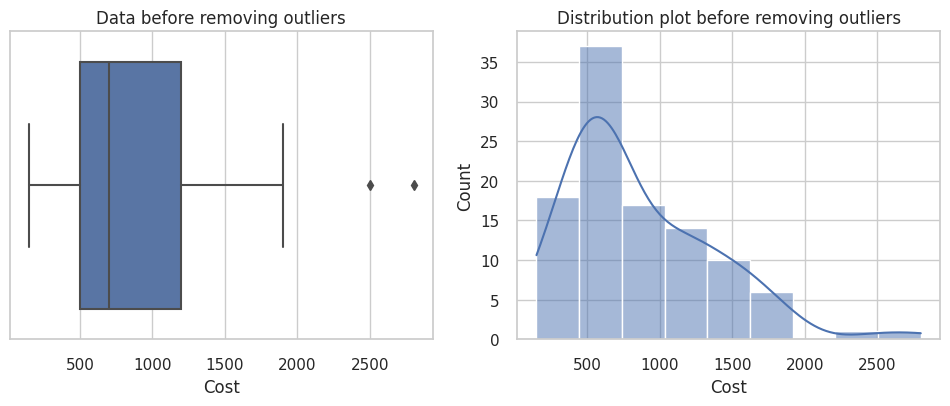

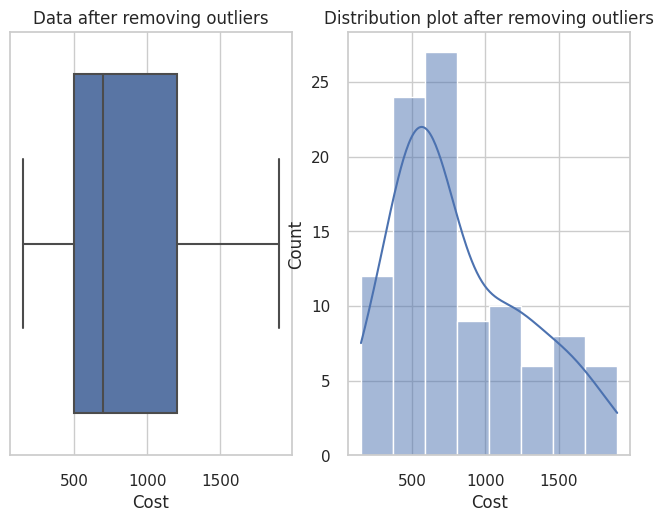

In [489]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(12, 4))

# Subplot 1: Boxplot before removing outliers
plt.subplot(1, 2, 1)
plt.title('Data before removing outliers')
sns.boxplot(x=zom_rest_name_df['Cost'])

# Subplot 2: Distribution plot before removing outliers
plt.subplot(1, 2, 2)
sns.histplot(zom_rest_name_df['Cost'], kde=True)
plt.title('Distribution plot before removing outliers')
plt.show()

# Calculate the interquartile range (IQR)
Q1 = zom_rest_name_df['Cost'].quantile(0.25)
Q3 = zom_rest_name_df['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers and display the modified dataframe
zom_rest_name_df = zom_rest_name_df[(zom_rest_name_df['Cost'] >= lower_bound) & (zom_rest_name_df['Cost'] <= upper_bound)]

# Subplot 1: Boxplot before removing outliers
plt.subplot(1, 2, 1)
plt.title('Data after removing outliers')
sns.boxplot(x=zom_rest_name_df['Cost'])

# Subplot 2: Distribution plot before removing outliers
plt.subplot(1, 2, 2)
sns.histplot(zom_rest_name_df['Cost'], kde=True)
plt.title('Distribution plot after removing outliers')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

The code uses the Interquartile Range (IQR) method for outlier treatment:
1. Initial visualization with boxplot and distribution plot.
2. Calculation of IQR.
3. Identification and removal of outliers based on IQR.
   - Outliers are defined using lower and upper bounds.
4. Visualizing the modified dataset after outlier removal.

The IQR method is chosen for its robustness, focusing on the middle 50% of data and less sensitivity to extreme values. It helps maintain a balance between outlier removal and retaining sufficient data for analysis.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [490]:
zom_rest_review_df.reset_index(inplace=True)
# review=zom_rest_review_df.Review
# review

In [491]:
# zom_rest_review_df['Review'] = zom_rest_review_df['Review'].apply(remove_punctuation)

In [492]:
# zom_rest_review_df['Review'] = zom_rest_review_df['Review'].apply(stopwords)

In [493]:
# reviews=zom_rest_review_df.Review
# reviews

In [494]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [495]:
# def lemmatization_(text):
#   for index,x in enumerate(text):
#     doc = nlp(x)
#     l=list()
#     for word in doc:
#       l.append(word.lemma_)
#       text[index]=' '.join(l)
#     return

In [496]:
# review=lemmatization_(review)
# review

In [497]:
# # Remove all extra spaces
# def remove_spaces (text):
#   for index,x in enumerate(text):
#     text[index]=" ".join(x.split())
#   return text

#### 2. Lower Casing

In [498]:
zom_rest_review_df['Review']

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [499]:
# Treating the 'Review' column  as strings
reviews = zom_rest_review_df['Review'].astype(str)

# Convert text to lowercase
zom_rest_review_df['Review'] = reviews.str.lower()

In [500]:
zom_rest_review_df['Review']

0       the ambience was good, food was quite good . h...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
9949    madhumathi mahajan well to start with nice cou...
9950    this place has never disappointed us.. the foo...
9951    bad rating is mainly because of "chicken bone ...
9952    i personally love and prefer chinese food. had...
9953    checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

#### 3. Removing Punctuations

In [501]:
# Remove special characters, punctuation, and numbers
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [502]:
zom_rest_review_df['Review']

0       the ambience was good food was quite good  had...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9949    madhumathi mahajan well to start with nice cou...
9950    this place has never disappointed us the food ...
9951    bad rating is mainly because of chicken bone f...
9952    i personally love and prefer chinese food had ...
9953    checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [503]:
# Removing URLs if there is any
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Remove words and digits containing digits
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))

In [504]:
zom_rest_review_df['Review']

0       the ambience was good food was quite good had ...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9949    madhumathi mahajan well to start with nice cou...
9950    this place has never disappointed us the food ...
9951    bad rating is mainly because of chicken bone f...
9952    i personally love and prefer chinese food had ...
9953    checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [505]:
# Remove stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [506]:
# Remove white spaces
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].str.strip()

In [507]:
zom_rest_review_df['Review']

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [508]:
# function to remove words greater than 40 and less than 2
# review = zom_rest_review_df['Review']
def len_less_than_2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=40])
  return review

In [509]:
zom_rest_review_df['Review']=zom_rest_review_df['Review'].apply(lambda x:len_less_than_2(x))

#### 7. Tokenization

In [510]:
# Tokenize the 'Review' column
zom_rest_review_df['Review'] = zom_rest_review_df['Review'].apply(word_tokenize)

# Print the tokenized version of the first review for illustration
print("Original Review:")
print(reviews.iloc[0])
print("\nTokenized Review:")
print(zom_rest_review_df['Review'].iloc[0])


Original Review:
The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.

Tokenized Review:
['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost', 'effective', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friends', 'parents', 'waiter', 'soumen', 'das', 'really', 'courteous', 'helpful']


#### 8. Text Normalization

In [511]:
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

In [512]:
zom_rest_review_df['Review']=zom_rest_review_df['Review'].apply(stemming)

##### Which text normalization technique have you used and why?

The text normalization technique used is stemming. Stemming reduces words to their base or root form by removing suffixes. The Snowball Stemmer with the English language setting is applied to each word in the 'Review' column of the DataFrame. Stemming is chosen to reduce variations in words and simplify the representation of text data for tasks like bag-of-words.

#### 10. Text Vectorization

In [513]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tf-idf vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Fit the vectorizer using the text data
tfidf_vectorizer.fit(zom_rest_review_df['Review'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf_vectorizer.vocabulary_.items()


##### Which text vectorization technique have you used and why?

The text vectorization technique used is TF-IDF (Term Frequency-Inverse Document Frequency). This technique calculates the importance of words in a document while considering their rarity across the entire dataset. By excluding common English stop words, TF-IDF focuses on meaningful and distinguishing terms, making it suitable for tasks such as information retrieval and document classification.

### Sentiment Analysis on Reviews

In [514]:
# Vectorizing Text
from textblob import TextBlob
import plotly.express as px

In [515]:
# A function to ger the subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [516]:
# A function to ger the polarity
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [517]:
# Creating two new columns of 'Subjectivity' and 'Polarity'
zom_rest_review_df['Subjectivity'] = zom_rest_review_df['Review'].apply(subjectivity)
zom_rest_review_df['Polarity'] = zom_rest_review_df['Review'].apply(polarity)

In [518]:
# A function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [519]:
zom_rest_review_df['Analysis'] = zom_rest_review_df['Polarity'].apply(getAnalysis)

In [520]:
# Plotting the Polarity and Subjectivity
fig = px.scatter(zom_rest_review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size = 'Subjectivity')
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type='line',
                               yref='paper', y0=0, y1=1,
                               xref='x', x0=0, x1=0)])
fig.show()

In [521]:
# Converting Analysis into numeric form(Positive and Neutral=0 and Negative = 1)
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral':
    return 0
  else:
    return 1

In [522]:
zom_rest_review_df['Analysis']=zom_rest_review_df['Analysis'].apply(lambda x:sentiment(x))

In [523]:
sentiment_df = zom_rest_review_df[['Review','Rating','Analysis']]
sentiment_df.head()

Review  Rating  Analysis
0  ambienc good food quit good saturday lunch cos...     5.0         0
1  ambienc good pleasant even servic prompt food ...     5.0         0
2  must tri great food great ambienc thnx servic ...     5.0         0
3  soumen das arun great guy behavior sincereti g...     5.0         0
4  food goodw order kodi drumstick basket mutton ...     5.0         0

In [524]:
x = sentiment_df['Review']
y = sentiment_df['Analysis']

In [525]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [526]:
# Creating tokens for text data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train= vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [527]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [528]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [529]:
# Transform Your data

### 6. Data Scaling

In [530]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [531]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [532]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [533]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1: MultinomialNB

In [545]:
# ML Model - 1 Implementation
model = MultinomialNB()

# Fit the Algorithm
model.fit(x_train,y_train)

# Predict on the model
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [550]:
def model_scores(y_train, y_test, y_pred_train, y_pred_test):
  print('='*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('='*50)
  conf_mat = confusion_matrix(y_pred_test,y_test)
  print("The confusion matrix on the test data is:")
  print(conf_mat)
  print('='*50)
  class_rep = classification_report(y_pred_test,y_test)
  print("The classification report on the train data is:")
  print(class_rep)
  print('='*50)

In [551]:
model_scores(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy is: 0.8467515070328199
Test accuracy is: 0.8356769787063077
The confusion matrix on the test data is:
[[2061  409]
 [   0   19]]
The classification report on the train data is:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2470
           1       0.04      1.00      0.09        19

    accuracy                           0.84      2489
   macro avg       0.52      0.92      0.50      2489
weighted avg       0.99      0.84      0.90      2489



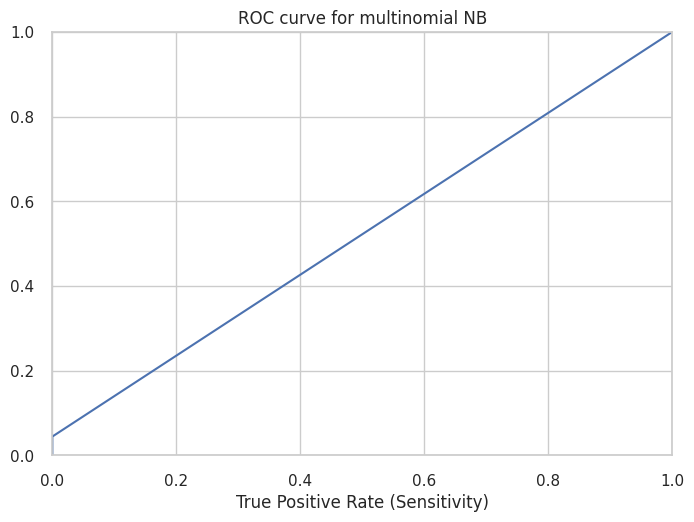

In [555]:
# ROC Graph
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for multinomial NB')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.xlabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [556]:
# Visualizing evaluation Metric Score chart
model_scores(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy is: 0.8467515070328199
Test accuracy is: 0.8356769787063077
The confusion matrix on the test data is:
[[2061  409]
 [   0   19]]
The classification report on the train data is:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2470
           1       0.04      1.00      0.09        19

    accuracy                           0.84      2489
   macro avg       0.52      0.92      0.50      2489
weighted avg       0.99      0.84      0.90      2489



The implemented Multinomial Naive Bayes model achieved an accuracy of 84.68% on the training set and 83.57% on the test set. While the model effectively predicted the majority class (0), it struggled with the minority class (1), resulting in low precision and F1-score for class 1. Improvement opportunities include model tuning or exploring alternative algorithms to address the imbalance in performance between the two classes.

### ML Model - 2: Random Forest Classifier with Cross Validation

In [558]:
# ML Model - 2 Implementation
rf_model = RandomForestClassifier()

# Finding the best parameters for Random Forest Classifier by grid search CV
rf_params = {'n_estimators':[100,150],'max_depth':[10,15],'criterion':['entropy']}
rf_cv = GridSearchCV(estimator=rf_model,param_grid = rf_params, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [559]:
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [560]:
rf_y_pred_train = rf_cv.predict(x_train)
rf_y_pred_test = rf_cv.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [561]:
# Visualizing evaluation Metric Score chart
model_scores(y_train, y_test, rf_y_pred_train, rf_y_pred_test)

Train accuracy is: 0.832417950435365
Test accuracy is: 0.8292486942547208
The confusion matrix on the test data is:
[[2061  425]
 [   0    3]]
The classification report on the train data is:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2486
           1       0.01      1.00      0.01         3

    accuracy                           0.83      2489
   macro avg       0.50      0.91      0.46      2489
weighted avg       1.00      0.83      0.91      2489



The implemented Random Forest Classifier achieved an accuracy of 83.24% on the training set and 82.92% on the test set. However, the model struggles with precision for the positive class and recall for the negative class.

### ML Model - 3: XGB classifier with crossvalidation

In [562]:
# ML Model - 3 Implementation
xgb_model=XGBClassifier()

# Finding the best parameters for XGBRegressor by GridSearchCV
xgb_params = {'n_estimators':[100,125,150],'max_depth':[7,10,15],'criterion':['entropy']}
xgb_cv = GridSearchCV(estimator=xgb_model,param_grid=xgb_params,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [563]:
xgb_cv.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [564]:
xgb_y_pred_train = xgb_cv.predict(x_train)
xgb_y_pred_test = xgb_cv.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [565]:
# Visualizing evaluation Metric Score chart
model_scores(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

Train accuracy is: 0.9953114534494307
Test accuracy is: 0.9509843310566493
The confusion matrix on the test data is:
[[2024   85]
 [  37  343]]
The classification report on the train data is:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2109
           1       0.80      0.90      0.85       380

    accuracy                           0.95      2489
   macro avg       0.89      0.93      0.91      2489
weighted avg       0.95      0.95      0.95      2489



The implemented XGBoost Classifier achieved high accuracy of 99.53% on the training set and 95.10% on the test set. It demonstrated excellent precision, recall, and F1-Score for both classes, making it a robust and effective model for the classification task.

### ML Model - 4: Support Vector Machine(SVM)

In [568]:
svm_clf = svm.SVC(probability=True)

In [569]:
svm_clf.fit(x_train, y_train)

SVC(probability=True)

In [570]:
svm_y_train_pred = svm_clf.predict(x_train)
svm_y_test_pred = svm_clf.predict(x_test)

In [571]:
model_scores(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

Train accuracy is: 0.9969189551239116
Test accuracy is: 0.9272800321414223
The confusion matrix on the test data is:
[[2043  163]
 [  18  265]]
The classification report on the train data is:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2206
           1       0.62      0.94      0.75       283

    accuracy                           0.93      2489
   macro avg       0.81      0.93      0.85      2489
weighted avg       0.95      0.93      0.93      2489



The implemented Support Vector Machine (SVM) classifier achieved high accuracy of 99.69% on the training set and 92.73% on the test set. It demonstrated excellent precision, recall, and F1-Score for class 0, and a good performance for class 1, effectively distinguishing between the two classes.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

In [573]:
model_scores_dict={'Model_Name':['MultinomialNB','Random Forest','XGB','SVM'],
                 'Training_Accuracy':[0.8467,0.8324,0.9953,0.9969],
                 'Test_Accuracy':[0.8356,0.8292,0.9509,0.9272]}

In [575]:
model_scores_df=pd.DataFrame(model_scores_dict)
model_scores_df

Model_Name  Training_Accuracy  Test_Accuracy
0  MultinomialNB             0.8467         0.8356
1  Random Forest             0.8324         0.8292
2            XGB             0.9953         0.9509
3            SVM             0.9969         0.9272

12:15

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [542]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [543]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***